In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from plotly.offline import init_notebook_mode, get_plotlyjs, iplot
import plotly.graph_objects as go
import cufflinks as cf
import plotly.express as px
cf.go_offline()
import scipy.stats
import imblearn
import warnings
warnings.filterwarnings("ignore")
cf.set_config_file(offline=False, world_readable=True)
sns.set()

In [2]:
data = pd.read_csv("C:/Users/rajku/Downloads/615098_1099843_bundle_archive/Bank_churn_modelling.csv")
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [3]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
data.shape

(10000, 14)

In [6]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

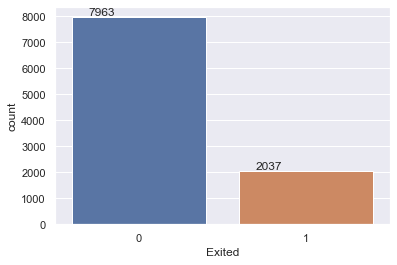

In [7]:
ax = sns.countplot('Exited', data=data)
for i in ax.patches:
    ax.annotate((i.get_height()), (i.get_x()+0.1, i.get_height()+50))

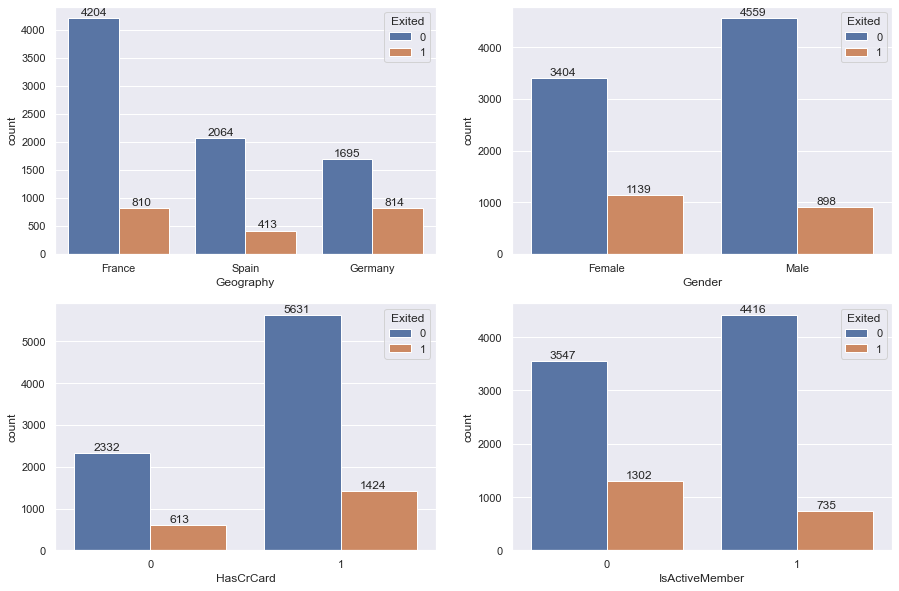

In [8]:
fig, ax = plt.subplots(2,2, figsize=(15,10))

ax1 = sns.countplot('Geography', data=data, hue='Exited', ax=ax[0,0])
for i in ax1.patches:
    ax1.annotate((i.get_height()), (i.get_x()+0.1, i.get_height()+50))
    
ax2 = sns.countplot('Gender', data=data, hue='Exited', ax=ax[0,1])
for i in ax2.patches:
    ax2.annotate((i.get_height()), (i.get_x()+0.1, i.get_height()+50))
    
ax3 = sns.countplot('HasCrCard', data=data, hue='Exited', ax=ax[1,0])
for i in ax3.patches:
    ax3.annotate((i.get_height()), (i.get_x()+0.1, i.get_height()+50))
    
ax4 = sns.countplot('IsActiveMember', data=data, hue='Exited', ax=ax[1,1])
for i in ax4.patches:
    ax4.annotate((i.get_height()), (i.get_x()+0.1, i.get_height()+50))


In [9]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [10]:
data.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [11]:
# y = data['Exited']
# data.drop("Exited", axis=1, inplace=True)

In [12]:
#Kruskal Wallis H Test to determine the relation between a categorical and continuous variable

numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for col in numeric_cols:
    Exited_1 = data.loc[data["Exited"]==1]
    Exited_0 = data.loc[data['Exited']==0]
    print("Overall variance of {} variable is {}" .format(col, round(data[col].var(),2)))
    print("Variance of {} variable with churned customers is {}" .format(col, round(Exited_1[col].var(),2)))
    print("Variance of {} variable with not churned customers is {}".format(col, round(Exited_0[col].var(),2)))
    print('*********************************************************')

Overall variance of CreditScore variable is 9341.86
Variance of CreditScore variable with churned customers is 10064.4
Variance of CreditScore variable with not churned customers is 9149.66
*********************************************************
Overall variance of Age variable is 109.99
Variance of Age variable with churned customers is 95.29
Variance of Age variable with not churned customers is 102.52
*********************************************************
Overall variance of Tenure variable is 8.36
Variance of Tenure variable with churned customers is 8.62
Variance of Tenure variable with not churned customers is 8.3
*********************************************************
Overall variance of Balance variable is 3893436175.99
Variance of Balance variable with churned customers is 3405982371.54
Variance of Balance variable with not churned customers is 3949876219.91
*********************************************************
Overall variance of NumOfProducts variable is 0.34
Vari

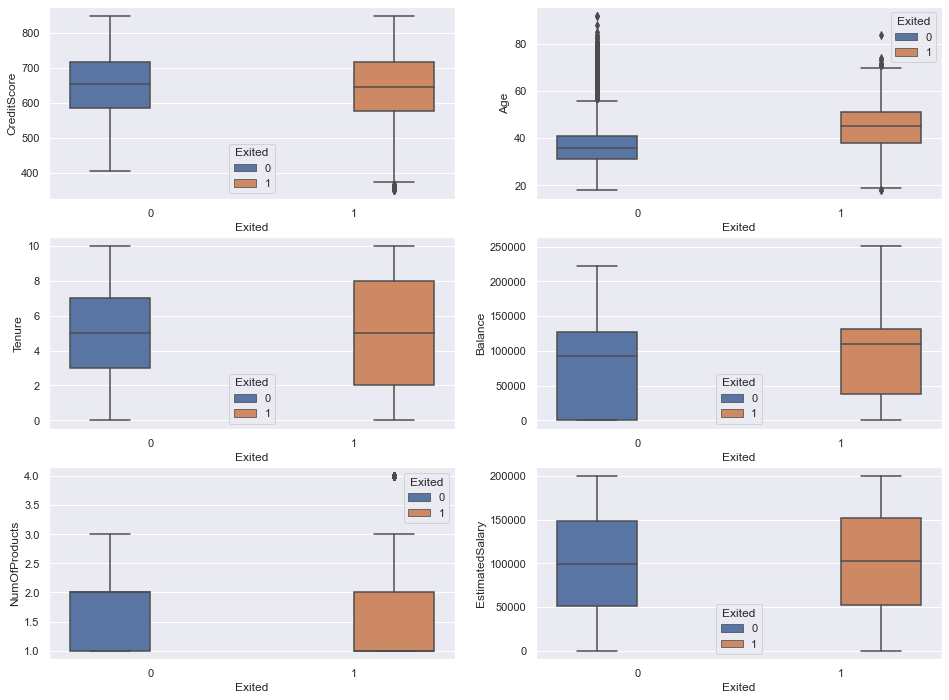

In [13]:
# Relation of taget variable with continuous variables

fig, ax = plt.subplots(3,2, figsize=(16,12))

sns.boxplot(x="Exited", y='CreditScore', data=data, hue="Exited", ax=ax[0,0])
sns.boxplot(x="Exited", y='Age', data=data, hue="Exited", ax=ax[0,1])
sns.boxplot(x="Exited", y='Tenure', data=data, hue="Exited", ax=ax[1,0])
sns.boxplot(x="Exited", y='Balance', data=data, hue="Exited", ax=ax[1,1])
sns.boxplot(x="Exited", y='NumOfProducts', data=data, hue="Exited", ax=ax[2,0])
sns.boxplot(x="Exited", y='EstimatedSalary', data=data, hue="Exited", ax=ax[2,1])

In [14]:
data['Gender'] = np.where(data['Gender']=='Female',1,-1)
data['IsActiveMember'] = np.where(data['IsActiveMember']==1,1,-1)
data['HasCrCard'] = np.where(data['HasCrCard']==1,1,-1)

In [15]:
data = pd.get_dummies(data, columns=['Geography'], prefix="Geography_")
data = pd.get_dummies(data, columns=['NumOfProducts'], prefix="NumOfProd_")
data.head()

CreditScore  Gender  Age  Tenure    Balance  HasCrCard  IsActiveMember  \
0          619       1   42       2       0.00          1               1   
1          608       1   41       1   83807.86         -1               1   
2          502       1   42       8  159660.80          1              -1   
3          699       1   39       1       0.00         -1              -1   
4          850       1   43       2  125510.82          1               1   

   EstimatedSalary  Exited  Geography__France  Geography__Germany  \
0        101348.88       1                  1                   0   
1        112542.58       0                  0                   0   
2        113931.57       1                  1                   0   
3         93826.63       0                  1                   0   
4         79084.10       0                  0                   0   

   Geography__Spain  NumOfProd__1  NumOfProd__2  NumOfProd__3  NumOfProd__4  
0                 0             1             0             0             0  
1                 1             1             0             0             0  
2                 0             0             0             1             0  
3                 0             0             1             0             0  
4                 1             1             0             0             0

In [16]:
for i in data.columns[-7:]:
    data[i] = np.where(data[i]==1,1,-1)
    
data.head()

CreditScore  Gender  Age  Tenure    Balance  HasCrCard  IsActiveMember  \
0          619       1   42       2       0.00          1               1   
1          608       1   41       1   83807.86         -1               1   
2          502       1   42       8  159660.80          1              -1   
3          699       1   39       1       0.00         -1              -1   
4          850       1   43       2  125510.82          1               1   

   EstimatedSalary  Exited  Geography__France  Geography__Germany  \
0        101348.88       1                  1                  -1   
1        112542.58       0                 -1                  -1   
2        113931.57       1                  1                  -1   
3         93826.63       0                  1                  -1   
4         79084.10       0                 -1                  -1   

   Geography__Spain  NumOfProd__1  NumOfProd__2  NumOfProd__3  NumOfProd__4  
0                -1             1            -1            -1            -1  
1                 1             1            -1            -1            -1  
2                -1            -1            -1             1            -1  
3                -1            -1             1            -1            -1  
4                 1             1            -1            -1            -1

In [17]:
temp_df = data.corr()

In [18]:
temp_df['Exited'].sort_values(ascending=False)

Exited                1.000000
Age                   0.285323
NumOfProd__3          0.255862
NumOfProd__1          0.185447
Geography__Germany    0.173488
NumOfProd__4          0.153612
Balance               0.118533
Gender                0.106512
EstimatedSalary       0.012097
HasCrCard            -0.007138
Tenure               -0.014001
CreditScore          -0.027094
Geography__Spain     -0.052667
Geography__France    -0.104955
IsActiveMember       -0.156128
NumOfProd__2         -0.292474
Name: Exited, dtype: float64

In [19]:
data['EstimatedSalvsCreditSC'] = round(data['EstimatedSalary']/data['CreditScore'])

data['AgevsTenure'] = round(data.Age.div(data.Tenure.where(data.Tenure != 0, data['Age'])),2)
data['AgevsTenure'] = data['AgevsTenure'].fillna(0)

data['BalancevsAge'] = round(data.Balance.div(data.Age.where(data.Balance != 0, data['Balance'])),2)
data['BalancevsAge'] = data['BalancevsAge'].fillna(0)

data['BalancevsCreditSc'] = round(data.Balance.div(data.CreditScore.where(data.Balance != 0, data['Balance'])),2)
data['BalancevsCreditSc'] = data['BalancevsCreditSc'].fillna(0)

data['CreditScvsAge'] = round(data['CreditScore']/data['Age'],2)

data['CreditScvsTenure'] = round(data.CreditScore.div(data.Tenure.where(data.Tenure != 0, data['CreditScore'])),2)
data['CreditScvsTenure'] = data['CreditScvsTenure'].fillna(0)

data['EstimatedSalvsAge'] = round(data.EstimatedSalary.div(data.Age.where(data.EstimatedSalary != 0, data['EstimatedSalary'])),2)
data['EstimatedSalvsAge'] = data['EstimatedSalvsAge'].fillna(0)

temp_cols = ['EstimatedSalvsCreditSC', 'AgevsTenure', 'BalancevsAge', 'BalancevsCreditSc', 'CreditScvsAge', 'CreditScvsTenure', 'EstimatedSalvsAge']

for col in temp_cols:
    Exited_1 = data.loc[data["Exited"]==1]
    Exited_0 = data.loc[data['Exited']==0]
    print("Overall variance of {} variable is {}" .format(col, round(data[col].var(),2)))
    print("Variance of {} variable with churned customers is {}" .format(col, round(Exited_1[col].var(),2)))
    print("Variance of {} variable with not churned customers is {}".format(col, round(Exited_0[col].var(),2)))
    print('****************************************************************************')

Overall variance of EstimatedSalvsCreditSC variable is 9040.11
Variance of EstimatedSalvsCreditSC variable with churned customers is 9829.71
Variance of EstimatedSalvsCreditSC variable with not churned customers is 8831.95
****************************************************************************
Overall variance of AgevsTenure variable is 130.55
Variance of AgevsTenure variable with churned customers is 182.78
Variance of AgevsTenure variable with not churned customers is 115.7
****************************************************************************
Overall variance of BalancevsAge variable is 3403710.29
Variance of BalancevsAge variable with churned customers is 2362400.72
Variance of BalancevsAge variable with not churned customers is 3669145.74
****************************************************************************
Overall variance of BalancevsCreditSc variable is 10260.54
Variance of BalancevsCreditSc variable with churned customers is 9361.52
Variance of BalancevsCredi

In [20]:
data.describe()

CreditScore        Gender           Age        Tenure        Balance  \
count  10000.000000  10000.000000  10000.000000  10000.000000   10000.000000   
mean     650.528800     -0.091400     38.921800      5.012800   76485.889288   
std       96.653299      0.995864     10.487806      2.892174   62397.405202   
min      350.000000     -1.000000     18.000000      0.000000       0.000000   
25%      584.000000     -1.000000     32.000000      3.000000       0.000000   
50%      652.000000     -1.000000     37.000000      5.000000   97198.540000   
75%      718.000000      1.000000     44.000000      7.000000  127644.240000   
max      850.000000      1.000000     92.000000     10.000000  250898.090000   

          HasCrCard  IsActiveMember  EstimatedSalary        Exited  \
count  10000.000000    10000.000000     10000.000000  10000.000000   
mean       0.411000        0.030200    100090.239881      0.203700   
std        0.911681        0.999594     57510.492818      0.402769   
min       -1.000000       -1.000000        11.580000      0.000000   
25%       -1.000000       -1.000000     51002.110000      0.000000   
50%        1.000000        1.000000    100193.915000      0.000000   
75%        1.000000        1.000000    149388.247500      0.000000   
max        1.000000        1.000000    199992.480000      1.000000   

       Geography__France  ...  NumOfProd__2  NumOfProd__3  NumOfProd__4  \
count       10000.000000  ...  10000.000000  10000.000000  10000.000000   
mean            0.002800  ...     -0.082000     -0.946800     -0.988000   
std             1.000046  ...      0.996682      0.321839      0.154462   
min            -1.000000  ...     -1.000000     -1.000000     -1.000000   
25%            -1.000000  ...     -1.000000     -1.000000     -1.000000   
50%             1.000000  ...     -1.000000     -1.000000     -1.000000   
75%             1.000000  ...      1.000000     -1.000000     -1.000000   
max             1.000000  ...      1.000000      1.000000      1.000000   

       EstimatedSalvsCreditSC   AgevsTenure  BalancevsAge  BalancevsCreditSc  \
count            10000.000000  10000.000000  10000.000000       10000.000000   
mean               157.578100     11.526616   2087.543910         120.301132   
std                 95.079504     11.425888   1844.914712         101.294311   
min                  0.000000      1.000000      0.000000           0.000000   
25%                 78.000000      4.670000      0.000000           0.000000   
50%                154.000000      7.170000   2315.580000         144.490000   
75%                230.000000     13.330000   3450.945000         199.582500   
max                548.000000     92.000000  10211.150000         464.800000   

       CreditScvsAge  CreditScvsTenure  EstimatedSalvsAge  
count    10000.00000      10000.000000       10000.000000  
mean        17.87432        191.178232        2751.423477  
std          5.37637        179.328477        1786.664839  
min          4.86000          1.000000           0.260000  
25%         14.09000         82.000000        1315.887500  
50%         17.29000        120.570000        2535.835000  
75%         20.96000        223.330000        3979.232500  
max         46.89000        850.000000       10962.340000  

[8 rows x 23 columns]

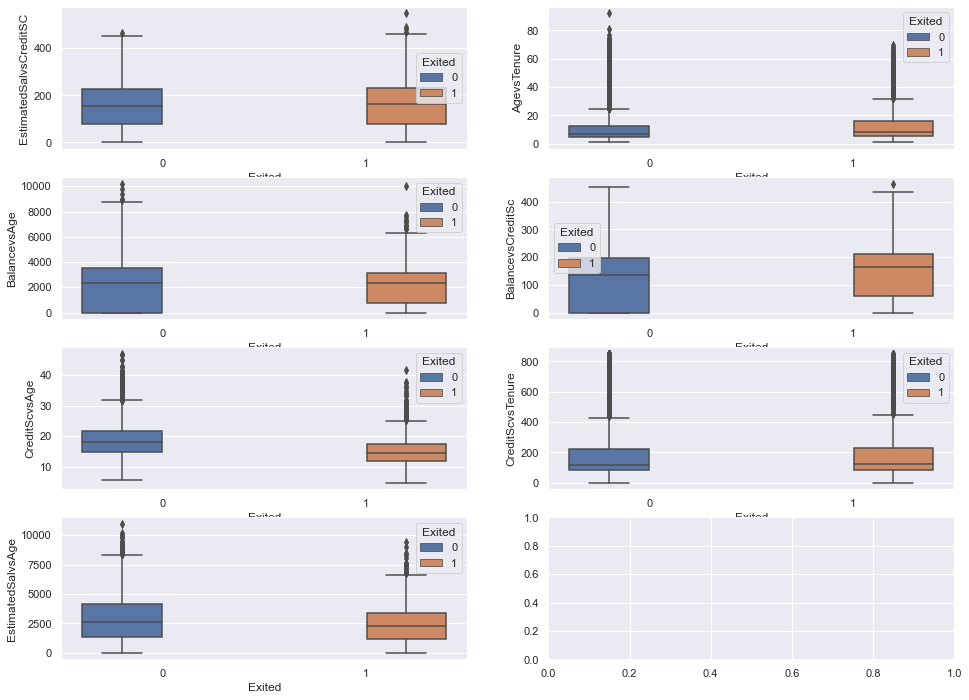

In [21]:
fig, ax = plt.subplots(4,2, figsize=(16,12))

sns.boxplot(x="Exited", y='EstimatedSalvsCreditSC', data=data, hue="Exited", ax=ax[0,0])
sns.boxplot(x="Exited", y='AgevsTenure', data=data, hue="Exited", ax=ax[0,1])
sns.boxplot(x="Exited", y='BalancevsAge', data=data, hue="Exited", ax=ax[1,0])
sns.boxplot(x="Exited", y='BalancevsCreditSc', data=data, hue="Exited", ax=ax[1,1])
sns.boxplot(x="Exited", y='CreditScvsAge', data=data, hue="Exited", ax=ax[2,0])
sns.boxplot(x="Exited", y='CreditScvsTenure', data=data, hue="Exited", ax=ax[2,1])
sns.boxplot(x="Exited", y='EstimatedSalvsAge', data=data, hue="Exited", ax=ax[3,0])

In [22]:
data.drop(['EstimatedSalvsCreditSC', 'CreditScvsTenure'], axis=1, inplace=True)

In [23]:
data.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography__France',
       'Geography__Germany', 'Geography__Spain', 'NumOfProd__1',
       'NumOfProd__2', 'NumOfProd__3', 'NumOfProd__4', 'AgevsTenure',
       'BalancevsAge', 'BalancevsCreditSc', 'CreditScvsAge',
       'EstimatedSalvsAge'],
      dtype='object')

In [24]:
pd.set_option('display.max_columns', 999)
columns = ['CreditScore' , 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'AgevsTenure', 'BalancevsAge', 'BalancevsCreditSc',
           'CreditScvsAge', 'EstimatedSalvsAge']

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

data[columns] = scaler.fit_transform(data[columns])

data.head()

CreditScore  Gender       Age  Tenure   Balance  HasCrCard  IsActiveMember  \
0        0.538       1  0.324324     0.2  0.000000          1               1   
1        0.516       1  0.310811     0.1  0.334031         -1               1   
2        0.304       1  0.324324     0.8  0.636357          1              -1   
3        0.698       1  0.283784     0.1  0.000000         -1              -1   
4        1.000       1  0.337838     0.2  0.500246          1               1   

   EstimatedSalary  Exited  Geography__France  Geography__Germany  \
0         0.506735       1                  1                  -1   
1         0.562709       0                 -1                  -1   
2         0.569654       1                  1                  -1   
3         0.469120       0                  1                  -1   
4         0.395400       0                 -1                  -1   

   Geography__Spain  NumOfProd__1  NumOfProd__2  NumOfProd__3  NumOfProd__4  \
0                -1             1            -1            -1            -1   
1                 1             1            -1            -1            -1   
2                -1            -1            -1             1            -1   
3                -1            -1             1            -1            -1   
4                 1             1            -1            -1            -1   

   AgevsTenure  BalancevsAge  BalancevsCreditSc  CreditScvsAge  \
0     0.219780      0.000000           0.000000       0.235070   
1     0.439560      0.200182           0.296558       0.237212   
2     0.046703      0.372284           0.684273       0.168689   
3     0.417582      0.000000           0.000000       0.310730   
4     0.225275      0.285850           0.317685       0.354747   

   EstimatedSalvsAge  
0           0.220105  
1           0.250379  
2           0.247435  
3           0.219443  
4           0.167752

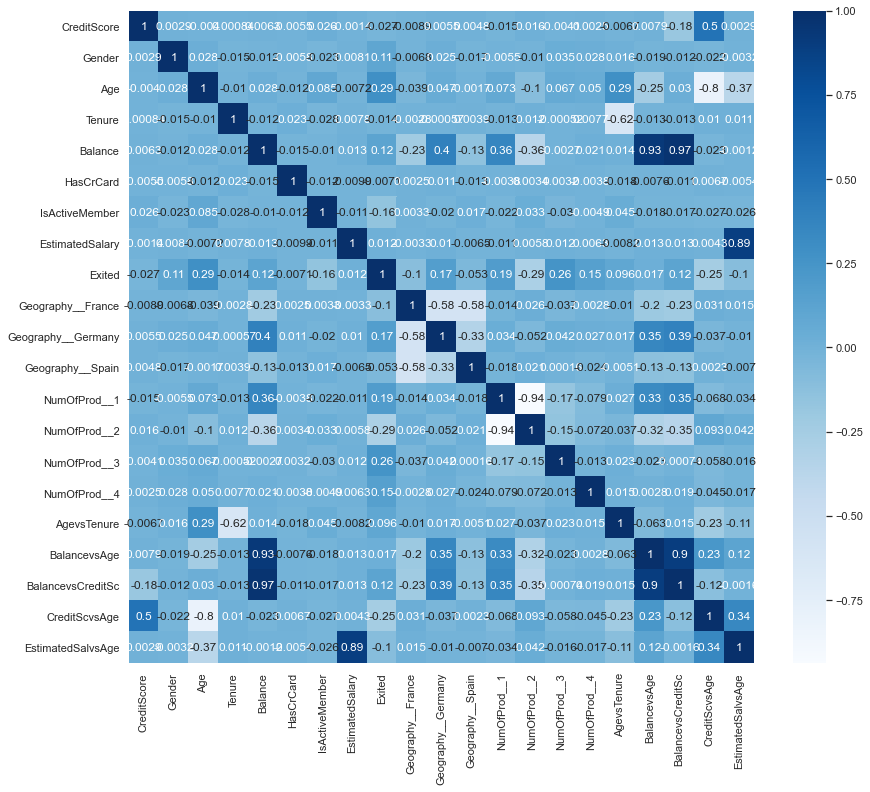

In [25]:
plt.figure(figsize=(14,12))

sns.heatmap(data.corr(), annot=True, cmap='Blues')

In [26]:
y = data["Exited"]
data.drop("Exited", axis=1, inplace=True)

In [27]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(data,y,test_size=0.3)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

In [30]:
log_reg = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train)

In [31]:
log_pred = log_reg.predict(X_test)

In [32]:
print("Accuracy: ", accuracy_score(y_test, log_pred))

Accuracy:  0.8456666666666667


In [33]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2407
           1       0.70      0.38      0.50       593

    accuracy                           0.85      3000
   macro avg       0.78      0.67      0.70      3000
weighted avg       0.83      0.85      0.83      3000



In [34]:
list_of_cols = list(zip(list(y_test), log_pred))

In [35]:
pd.set_option('display.max_rows',9999)
d = pd.DataFrame(list_of_cols, columns=['actual', 'pred'])
d

actual  pred
0          0     0
1          1     1
2          0     0
3          0     0
4          1     0
5          0     0
6          0     0
7          0     0
8          0     0
9          0     0
10         0     0
11         1     0
12         0     0
13         0     0
14         0     0
15         1     0
16         1     0
17         0     0
18         0     0
19         1     1
20         0     0
21         0     0
22         0     0
23         1     0
24         0     0
25         0     0
26         0     0
27         0     0
28         0     0
29         0     0
30         0     0
31         0     0
32         0     0
33         0     0
34         1     0
35         0     0
36         0     0
37         0     0
38         0     0
39         0     0
40         1     0
41         0     0
42         0     0
43         0     0
44         1     1
45         0     0
46         1     0
47         0     1
48         0     0
49         0     0
50         0     0
51         1     0
52         0     0
53         1     0
54         0     0
55         0     0
56         1     1
57         0     0
58         0     0
59         0     0
60         1     1
61         0     0
62         0     0
63         0     0
64         0     0
65         0     0
66         0     0
67         0     0
68         0     0
69         0     0
70         0     0
71         0     0
72         0     0
73         0     0
74         0     0
75         0     0
76         0     0
77         0     0
78         0     0
79         0     0
80         0     0
81         1     0
82         1     1
83         0     0
84         0     0
85         1     1
86         0     0
87         1     0
88         0     0
89         0     0
90         1     0
91         0     0
92         0     0
93         0     0
94         0     0
95         0     0
96         0     0
97         0     0
98         0     0
99         0     0
100        0     0
101        0     0
102        0     0
103        0     0
104        0     0
105        1     0
106        0     0
107        1     0
108        0     0
109        0     0
110        0     0
111        0     0
112        0     1
113        0     0
114        0     0
115        0     0
116        0     0
117        0     0
118        0     0
119        0     0
120        0     0
121        0     0
122        0     0
123        1     0
124        0     0
125        0     0
126        0     0
127        0     0
128        0     0
129        0     0
130        1     0
131        0     0
132        0     0
133        0     0
134        0     0
135        1     1
136        0     0
137        0     0
138        1     0
139        1     0
140        0     0
141        0     0
142        1     1
143        0     0
144        1     0
145        0     0
146        1     0
147        0     0
148        0     0
149        1     1
150        0     0
151        0     0
152        0     0
153        0     0
154        0     0
155        0     0
156        0     0
157        0     0
158        0     0
159        0     0
160        0     0
161        0     0
162        0     0
163        0     0
164        0     0
165        0     0
166        0     0
167        0     0
168        0     0
169        0     0
170        0     0
171        0     0
172        0     0
173        0     0
174        0     0
175        0     0
176        0     0
177        0     0
178        0     0
179        1     0
180        0     0
181        0     0
182        0     0
183        0     0
184        0     0
185        1     0
186        0     0
187        0     0
188        0     0
189        0     0
190        0     0
191        0     0
192        0     0
193        1     0
194        0     0
195        0     0
196        0     0
197        1     0
198        0     0
199        0     0
200        1     1
201        0     0
202        0     0
203        0     0
204        1     1
205        0     0
206        0     0
207        0     0
208        0     0
209        0    

In [36]:
print(confusion_matrix(y_test, log_pred))

[[2309   98]
 [ 365  228]]


In [37]:
from sklearn.model_selection import GridSearchCV

param_grid= {'C':[0.1, 1, 10, 100],
            'gamma':[0.1, 0.01, 0.001, 0.0001],
            'kernel':['linear', 'rbf']}

In [ ]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

In [ ]:
print(grid.best_params_)

In [ ]:
print(grid.best_estimator_)

In [ ]:
grid_pred = grid.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, grid_pred))

In [ ]:
print(classification_report(y_test, grid_pred))

In [ ]:
print(confusion_matrix(y_test, grid_pred))

In [ ]:
print(RandomForestClassifier().get_params)

In [ ]:
rf_params = {'n_estimators':[10, 40, 50, 75, 100, 200],
            'max_features':['sqrt', 0.25, 0.5, 1, 10],
            'min_samples_leaf':[0.1, 1, 2, 4, 6, 8, 10]}

In [ ]:
rf_model = RandomForestClassifier(random_state=1)

rf_grid_search = GridSearchCV(rf_model, rf_params, cv=5, refit=True, verbose=3)
rf_grid_search.fit(X_train, y_train)

In [ ]:
print(rf_grid_search.best_params_)

In [ ]:
rf_grid_pred = rf_grid_search.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, rf_grid_pred))

In [ ]:
print(classification_report(y_test, rf_grid_pred))

In [ ]:
print(confusion_matrix(y_test, rf_grid_pred))

In [ ]:
print(XGBClassifier().get_params)

In [92]:
xg_params = {'learning_rate':[0.01, 0.1, 0.8],
            'max_depth':[3, 6, 10],
            'min_child_weight':[1, 3, 6],
            'gamma':[0.1, 1, 10],
            'subsample':[0.5, 0.8,1],
            'colsample_bytree':[0.5,0.8, 1],
            'reg_alpha':[1e-5, 1e-2, 1, 100],
            "objective":['binary:logistic']}

In [ ]:
xg_params_fit = GridSearchCV(XGBClassifier(), xg_params, refit=True, verbose=3)

xg_params_fit.fit(X_train,y_train)

In [ ]:
print(xg_params_fit.best_params_)

In [ ]:
xgboost_grid_pred = xg_params_fit.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, xgboost_grid_pred))

In [ ]:
print(classification_report(y_test, xgboost_grid_pred))

In [ ]:
print(confusion_matrix(y_test, xgboost_grid_pred))

In [39]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)

In [51]:
sm_data_X, sm_data_y = sm.fit_sample(X_train, y_train)

In [52]:
sm_data_X = pd.DataFrame(data=sm_data_X,columns=X_train.columns )
sm_data_y= pd.DataFrame(data=sm_data_y,columns=['Exited'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(sm_data_X))
print("Original length of data was: ", len(X_train))
print("Number of customers not churned in oversampled data",len(sm_data_y[sm_data_y['Exited']==0]))
print("Number of customers churned in oversampled data",len(sm_data_y[sm_data_y['Exited']==1]))
print("Proportion of no subscription data in oversampled data is ",len(sm_data_y[sm_data_y['Exited']==0])/len(sm_data_X))
print("Proportion of subscription data in oversampled data is ",len(sm_data_y[sm_data_y['Exited']==1])/len(sm_data_X))

length of oversampled data is  11112
Original length of data was:  7000
Number of no subscription in oversampled data 5556
Number of subscription 5556
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [54]:
log_reg_sm = LogisticRegression(solver='liblinear', random_state=0).fit(sm_data_X, sm_data_y)
log_pred_sm = log_reg_sm.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, log_pred_sm))

Accuracy:  0.7653333333333333


C:\Users\rajku\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [55]:
print(classification_report(y_test, log_pred_sm))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84      2407
           1       0.45      0.76      0.56       593

    accuracy                           0.77      3000
   macro avg       0.69      0.76      0.70      3000
weighted avg       0.83      0.77      0.78      3000



In [57]:
print(confusion_matrix(y_test, log_pred_sm))

[[1846  561]
 [ 143  450]]


In [60]:
from sklearn.model_selection import GridSearchCV

param_grid= {'C':[0.1, 1, 10, 100],
            'gamma':[0.1, 0.01, 0.001, 0.0001],
            'kernel':['linear', 'rbf']}

In [64]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(sm_data_X, sm_data_y)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] C=0.1, gamma=0.1, kernel=linear .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.753, total=   1.8s
[CV] C=0.1, gamma=0.1, kernel=linear .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.756, total=   1.8s
[CV] C=0.1, gamma=0.1, kernel=linear .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s


[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.762, total=   1.9s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.778, total=   1.7s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.767, total=   1.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.720, total=   2.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.723, total=   2.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.712, total=   2.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.735, total=   2.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ..... C=1, gamma=0.001, kernel=linear, score=0.750, total=   2.1s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] ..... C=1, gamma=0.001, kernel=linear, score=0.753, total=   2.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] ..... C=1, gamma=0.001, kernel=linear, score=0.764, total=   2.1s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] ..... C=1, gamma=0.001, kernel=linear, score=0.775, total=   2.2s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] ..... C=1, gamma=0.001, kernel=linear, score=0.768, total=   2.2s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.674, total=   3.3s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.684, total=   3.4s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] .

[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.690, total=   3.7s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.687, total=   3.5s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] ..... C=100, gamma=0.1, kernel=linear, score=0.748, total=  15.2s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] ..... C=100, gamma=0.1, kernel=linear, score=0.754, total=  13.6s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] ..... C=100, gamma=0.1, kernel=linear, score=0.764, total=  13.8s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] ..... C=100, gamma=0.1, kernel=linear, score=0.775, total=  14.2s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] ..... C=100, gamma=0.1, kernel=linear, score=0.769, total=  13.2s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed: 11.9min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [65]:
print(grid.best_params_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [66]:
print(grid.best_estimator_)

SVC(C=100, gamma=0.1)


In [67]:
grid_pred_sm = grid.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, grid_pred_sm))

Accuracy:  0.7813333333333333


In [68]:
print(classification_report(y_test, grid_pred_sm))

              precision    recall  f1-score   support

           0       0.92      0.80      0.85      2407
           1       0.47      0.71      0.56       593

    accuracy                           0.78      3000
   macro avg       0.69      0.75      0.71      3000
weighted avg       0.83      0.78      0.80      3000



In [69]:
print(confusion_matrix(y_test, grid_pred_sm))

[[1923  484]
 [ 172  421]]


In [70]:
print(RandomForestClassifier().get_params)

<bound method BaseEstimator.get_params of RandomForestClassifier()>


In [71]:
rf_params = {'n_estimators':[10, 40, 50, 75, 100, 200],
            'max_features':['sqrt', 0.25, 0.5, 1, 10],
            'min_samples_leaf':[0.1, 1, 2, 4, 6, 8, 10]}

In [73]:
rf_model = RandomForestClassifier(random_state=1)

rf_grid_search_sm = GridSearchCV(rf_model, rf_params, cv=5, refit=True, verbose=3)
rf_grid_search_sm.fit(sm_data_X, sm_data_y)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits
[CV] max_features=sqrt, min_samples_leaf=0.1, n_estimators=10 ........
[CV]  max_features=sqrt, min_samples_leaf=0.1, n_estimators=10, score=0.716, total=   0.1s
[CV] max_features=sqrt, min_samples_leaf=0.1, n_estimators=10 ........
[CV]  max_features=sqrt, min_samples_leaf=0.1, n_estimators=10, score=0.742, total=   0.1s
[CV] max_features=sqrt, min_samples_leaf=0.1, n_estimators=10 ........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  max_features=sqrt, min_samples_leaf=0.1, n_estimators=10, score=0.760, total=   0.1s
[CV] max_features=sqrt, min_samples_leaf=0.1, n_estimators=10 ........
[CV]  max_features=sqrt, min_samples_leaf=0.1, n_estimators=10, score=0.744, total=   0.1s
[CV] max_features=sqrt, min_samples_leaf=0.1, n_estimators=10 ........
[CV]  max_features=sqrt, min_samples_leaf=0.1, n_estimators=10, score=0.753, total=   0.1s
[CV] max_features=sqrt, min_samples_leaf=0.1, n_estimators=40 ........
[CV]  max_features=sqrt, min_samples_leaf=0.1, n_estimators=40, score=0.729, total=   0.2s
[CV] max_features=sqrt, min_samples_leaf=0.1, n_estimators=40 ........
[CV]  max_features=sqrt, min_samples_leaf=0.1, n_estimators=40, score=0.747, total=   0.3s
[CV] max_features=sqrt, min_samples_leaf=0.1, n_estimators=40 ........
[CV]  max_features=sqrt, min_samples_leaf=0.1, n_estimators=40, score=0.765, total=   0.2s
[CV] max_features=sqrt, min_samples_leaf=0.1, n_estimators=40 ........
[CV]  max_features=sqrt, min

[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=100, score=0.896, total=   1.7s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=100 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=100, score=0.884, total=   1.7s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=200 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=200, score=0.845, total=   3.4s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=200 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=200, score=0.882, total=   3.4s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=200 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=200, score=0.900, total=   3.3s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=200 .........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=200, score=0.897, total=   3.0s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=200 .........
[CV]  max_features=sqrt, min_sampl

[CV]  max_features=sqrt, min_samples_leaf=4, n_estimators=75, score=0.822, total=   1.0s
[CV] max_features=sqrt, min_samples_leaf=4, n_estimators=75 ..........
[CV]  max_features=sqrt, min_samples_leaf=4, n_estimators=75, score=0.858, total=   1.0s
[CV] max_features=sqrt, min_samples_leaf=4, n_estimators=75 ..........
[CV]  max_features=sqrt, min_samples_leaf=4, n_estimators=75, score=0.876, total=   1.0s
[CV] max_features=sqrt, min_samples_leaf=4, n_estimators=75 ..........
[CV]  max_features=sqrt, min_samples_leaf=4, n_estimators=75, score=0.875, total=   1.1s
[CV] max_features=sqrt, min_samples_leaf=4, n_estimators=75 ..........
[CV]  max_features=sqrt, min_samples_leaf=4, n_estimators=75, score=0.857, total=   1.0s
[CV] max_features=sqrt, min_samples_leaf=4, n_estimators=100 .........
[CV]  max_features=sqrt, min_samples_leaf=4, n_estimators=100, score=0.820, total=   1.4s
[CV] max_features=sqrt, min_samples_leaf=4, n_estimators=100 .........
[CV]  max_features=sqrt, min_samples_le

[CV]  max_features=sqrt, min_samples_leaf=8, n_estimators=40, score=0.858, total=   0.5s
[CV] max_features=sqrt, min_samples_leaf=8, n_estimators=40 ..........
[CV]  max_features=sqrt, min_samples_leaf=8, n_estimators=40, score=0.865, total=   0.5s
[CV] max_features=sqrt, min_samples_leaf=8, n_estimators=40 ..........
[CV]  max_features=sqrt, min_samples_leaf=8, n_estimators=40, score=0.842, total=   0.5s
[CV] max_features=sqrt, min_samples_leaf=8, n_estimators=50 ..........
[CV]  max_features=sqrt, min_samples_leaf=8, n_estimators=50, score=0.800, total=   0.6s
[CV] max_features=sqrt, min_samples_leaf=8, n_estimators=50 ..........
[CV]  max_features=sqrt, min_samples_leaf=8, n_estimators=50, score=0.837, total=   0.6s
[CV] max_features=sqrt, min_samples_leaf=8, n_estimators=50 ..........
[CV]  max_features=sqrt, min_samples_leaf=8, n_estimators=50, score=0.858, total=   0.6s
[CV] max_features=sqrt, min_samples_leaf=8, n_estimators=50 ..........
[CV]  max_features=sqrt, min_samples_lea

[CV]  max_features=sqrt, min_samples_leaf=10, n_estimators=200, score=0.858, total=   2.4s
[CV] max_features=sqrt, min_samples_leaf=10, n_estimators=200 ........
[CV]  max_features=sqrt, min_samples_leaf=10, n_estimators=200, score=0.841, total=   2.3s
[CV] max_features=0.25, min_samples_leaf=0.1, n_estimators=10 ........
[CV]  max_features=0.25, min_samples_leaf=0.1, n_estimators=10, score=0.710, total=   0.1s
[CV] max_features=0.25, min_samples_leaf=0.1, n_estimators=10 ........
[CV]  max_features=0.25, min_samples_leaf=0.1, n_estimators=10, score=0.734, total=   0.1s
[CV] max_features=0.25, min_samples_leaf=0.1, n_estimators=10 ........
[CV]  max_features=0.25, min_samples_leaf=0.1, n_estimators=10, score=0.758, total=   0.1s
[CV] max_features=0.25, min_samples_leaf=0.1, n_estimators=10 ........
[CV]  max_features=0.25, min_samples_leaf=0.1, n_estimators=10, score=0.755, total=   0.1s
[CV] max_features=0.25, min_samples_leaf=0.1, n_estimators=10 ........
[CV]  max_features=0.25, min

[CV]  max_features=0.25, min_samples_leaf=1, n_estimators=75, score=0.882, total=   1.3s
[CV] max_features=0.25, min_samples_leaf=1, n_estimators=100 .........
[CV]  max_features=0.25, min_samples_leaf=1, n_estimators=100, score=0.846, total=   1.7s
[CV] max_features=0.25, min_samples_leaf=1, n_estimators=100 .........
[CV]  max_features=0.25, min_samples_leaf=1, n_estimators=100, score=0.878, total=   1.7s
[CV] max_features=0.25, min_samples_leaf=1, n_estimators=100 .........
[CV]  max_features=0.25, min_samples_leaf=1, n_estimators=100, score=0.895, total=   1.7s
[CV] max_features=0.25, min_samples_leaf=1, n_estimators=100 .........
[CV]  max_features=0.25, min_samples_leaf=1, n_estimators=100, score=0.893, total=   2.2s
[CV] max_features=0.25, min_samples_leaf=1, n_estimators=100 .........
[CV]  max_features=0.25, min_samples_leaf=1, n_estimators=100, score=0.883, total=   2.3s
[CV] max_features=0.25, min_samples_leaf=1, n_estimators=200 .........
[CV]  max_features=0.25, min_sample

[CV]  max_features=0.25, min_samples_leaf=4, n_estimators=50, score=0.856, total=   0.9s
[CV] max_features=0.25, min_samples_leaf=4, n_estimators=50 ..........
[CV]  max_features=0.25, min_samples_leaf=4, n_estimators=50, score=0.870, total=   0.8s
[CV] max_features=0.25, min_samples_leaf=4, n_estimators=50 ..........
[CV]  max_features=0.25, min_samples_leaf=4, n_estimators=50, score=0.873, total=   0.8s
[CV] max_features=0.25, min_samples_leaf=4, n_estimators=50 ..........
[CV]  max_features=0.25, min_samples_leaf=4, n_estimators=50, score=0.857, total=   0.9s
[CV] max_features=0.25, min_samples_leaf=4, n_estimators=75 ..........
[CV]  max_features=0.25, min_samples_leaf=4, n_estimators=75, score=0.819, total=   1.3s
[CV] max_features=0.25, min_samples_leaf=4, n_estimators=75 ..........
[CV]  max_features=0.25, min_samples_leaf=4, n_estimators=75, score=0.861, total=   1.3s
[CV] max_features=0.25, min_samples_leaf=4, n_estimators=75 ..........
[CV]  max_features=0.25, min_samples_lea

[CV]  max_features=0.25, min_samples_leaf=8, n_estimators=10, score=0.843, total=   0.2s
[CV] max_features=0.25, min_samples_leaf=8, n_estimators=10 ..........
[CV]  max_features=0.25, min_samples_leaf=8, n_estimators=10, score=0.838, total=   0.2s
[CV] max_features=0.25, min_samples_leaf=8, n_estimators=40 ..........
[CV]  max_features=0.25, min_samples_leaf=8, n_estimators=40, score=0.805, total=   0.6s
[CV] max_features=0.25, min_samples_leaf=8, n_estimators=40 ..........
[CV]  max_features=0.25, min_samples_leaf=8, n_estimators=40, score=0.839, total=   0.7s
[CV] max_features=0.25, min_samples_leaf=8, n_estimators=40 ..........
[CV]  max_features=0.25, min_samples_leaf=8, n_estimators=40, score=0.859, total=   0.6s
[CV] max_features=0.25, min_samples_leaf=8, n_estimators=40 ..........
[CV]  max_features=0.25, min_samples_leaf=8, n_estimators=40, score=0.859, total=   0.7s
[CV] max_features=0.25, min_samples_leaf=8, n_estimators=40 ..........
[CV]  max_features=0.25, min_samples_lea

[CV]  max_features=0.25, min_samples_leaf=10, n_estimators=100, score=0.842, total=   1.5s
[CV] max_features=0.25, min_samples_leaf=10, n_estimators=200 ........
[CV]  max_features=0.25, min_samples_leaf=10, n_estimators=200, score=0.804, total=   3.1s
[CV] max_features=0.25, min_samples_leaf=10, n_estimators=200 ........
[CV]  max_features=0.25, min_samples_leaf=10, n_estimators=200, score=0.839, total=   2.9s
[CV] max_features=0.25, min_samples_leaf=10, n_estimators=200 ........
[CV]  max_features=0.25, min_samples_leaf=10, n_estimators=200, score=0.856, total=   3.3s
[CV] max_features=0.25, min_samples_leaf=10, n_estimators=200 ........
[CV]  max_features=0.25, min_samples_leaf=10, n_estimators=200, score=0.851, total=   3.6s
[CV] max_features=0.25, min_samples_leaf=10, n_estimators=200 ........
[CV]  max_features=0.25, min_samples_leaf=10, n_estimators=200, score=0.841, total=   3.0s
[CV] max_features=0.5, min_samples_leaf=0.1, n_estimators=10 .........
[CV]  max_features=0.5, min_

[CV]  max_features=0.5, min_samples_leaf=1, n_estimators=75, score=0.833, total=   2.3s
[CV] max_features=0.5, min_samples_leaf=1, n_estimators=75 ...........
[CV]  max_features=0.5, min_samples_leaf=1, n_estimators=75, score=0.879, total=   2.2s
[CV] max_features=0.5, min_samples_leaf=1, n_estimators=75 ...........
[CV]  max_features=0.5, min_samples_leaf=1, n_estimators=75, score=0.888, total=   2.2s
[CV] max_features=0.5, min_samples_leaf=1, n_estimators=75 ...........
[CV]  max_features=0.5, min_samples_leaf=1, n_estimators=75, score=0.895, total=   2.4s
[CV] max_features=0.5, min_samples_leaf=1, n_estimators=75 ...........
[CV]  max_features=0.5, min_samples_leaf=1, n_estimators=75, score=0.882, total=   2.3s
[CV] max_features=0.5, min_samples_leaf=1, n_estimators=100 ..........
[CV]  max_features=0.5, min_samples_leaf=1, n_estimators=100, score=0.831, total=   3.2s
[CV] max_features=0.5, min_samples_leaf=1, n_estimators=100 ..........
[CV]  max_features=0.5, min_samples_leaf=1, n

[CV]  max_features=0.5, min_samples_leaf=4, n_estimators=40, score=0.872, total=   1.1s
[CV] max_features=0.5, min_samples_leaf=4, n_estimators=40 ...........
[CV]  max_features=0.5, min_samples_leaf=4, n_estimators=40, score=0.877, total=   1.3s
[CV] max_features=0.5, min_samples_leaf=4, n_estimators=40 ...........
[CV]  max_features=0.5, min_samples_leaf=4, n_estimators=40, score=0.862, total=   1.2s
[CV] max_features=0.5, min_samples_leaf=4, n_estimators=50 ...........
[CV]  max_features=0.5, min_samples_leaf=4, n_estimators=50, score=0.813, total=   1.6s
[CV] max_features=0.5, min_samples_leaf=4, n_estimators=50 ...........
[CV]  max_features=0.5, min_samples_leaf=4, n_estimators=50, score=0.857, total=   1.3s
[CV] max_features=0.5, min_samples_leaf=4, n_estimators=50 ...........
[CV]  max_features=0.5, min_samples_leaf=4, n_estimators=50, score=0.874, total=   1.3s
[CV] max_features=0.5, min_samples_leaf=4, n_estimators=50 ...........
[CV]  max_features=0.5, min_samples_leaf=4, n_

[CV]  max_features=0.5, min_samples_leaf=6, n_estimators=200, score=0.856, total=   5.8s
[CV] max_features=0.5, min_samples_leaf=8, n_estimators=10 ...........
[CV]  max_features=0.5, min_samples_leaf=8, n_estimators=10, score=0.796, total=   0.3s
[CV] max_features=0.5, min_samples_leaf=8, n_estimators=10 ...........
[CV]  max_features=0.5, min_samples_leaf=8, n_estimators=10, score=0.846, total=   0.3s
[CV] max_features=0.5, min_samples_leaf=8, n_estimators=10 ...........
[CV]  max_features=0.5, min_samples_leaf=8, n_estimators=10, score=0.858, total=   0.3s
[CV] max_features=0.5, min_samples_leaf=8, n_estimators=10 ...........
[CV]  max_features=0.5, min_samples_leaf=8, n_estimators=10, score=0.847, total=   0.3s
[CV] max_features=0.5, min_samples_leaf=8, n_estimators=10 ...........
[CV]  max_features=0.5, min_samples_leaf=8, n_estimators=10, score=0.839, total=   0.4s
[CV] max_features=0.5, min_samples_leaf=8, n_estimators=40 ...........
[CV]  max_features=0.5, min_samples_leaf=8, n

[CV]  max_features=0.5, min_samples_leaf=10, n_estimators=100, score=0.842, total=   3.1s
[CV] max_features=0.5, min_samples_leaf=10, n_estimators=100 .........
[CV]  max_features=0.5, min_samples_leaf=10, n_estimators=100, score=0.855, total=   4.1s
[CV] max_features=0.5, min_samples_leaf=10, n_estimators=100 .........
[CV]  max_features=0.5, min_samples_leaf=10, n_estimators=100, score=0.856, total=   4.1s
[CV] max_features=0.5, min_samples_leaf=10, n_estimators=100 .........
[CV]  max_features=0.5, min_samples_leaf=10, n_estimators=100, score=0.846, total=   4.0s
[CV] max_features=0.5, min_samples_leaf=10, n_estimators=200 .........
[CV]  max_features=0.5, min_samples_leaf=10, n_estimators=200, score=0.804, total=   9.9s
[CV] max_features=0.5, min_samples_leaf=10, n_estimators=200 .........
[CV]  max_features=0.5, min_samples_leaf=10, n_estimators=200, score=0.842, total=  11.5s
[CV] max_features=0.5, min_samples_leaf=10, n_estimators=200 .........
[CV]  max_features=0.5, min_sample

[CV]  max_features=1, min_samples_leaf=1, n_estimators=50, score=0.902, total=   0.8s
[CV] max_features=1, min_samples_leaf=1, n_estimators=50 .............
[CV]  max_features=1, min_samples_leaf=1, n_estimators=50, score=0.898, total=   0.9s
[CV] max_features=1, min_samples_leaf=1, n_estimators=75 .............
[CV]  max_features=1, min_samples_leaf=1, n_estimators=75, score=0.866, total=   1.0s
[CV] max_features=1, min_samples_leaf=1, n_estimators=75 .............
[CV]  max_features=1, min_samples_leaf=1, n_estimators=75, score=0.890, total=   0.9s
[CV] max_features=1, min_samples_leaf=1, n_estimators=75 .............
[CV]  max_features=1, min_samples_leaf=1, n_estimators=75, score=0.903, total=   0.8s
[CV] max_features=1, min_samples_leaf=1, n_estimators=75 .............
[CV]  max_features=1, min_samples_leaf=1, n_estimators=75, score=0.903, total=   0.9s
[CV] max_features=1, min_samples_leaf=1, n_estimators=75 .............
[CV]  max_features=1, min_samples_leaf=1, n_estimators=75,

[CV]  max_features=1, min_samples_leaf=4, n_estimators=40, score=0.839, total=   0.4s
[CV] max_features=1, min_samples_leaf=4, n_estimators=40 .............
[CV]  max_features=1, min_samples_leaf=4, n_estimators=40, score=0.867, total=   0.4s
[CV] max_features=1, min_samples_leaf=4, n_estimators=40 .............
[CV]  max_features=1, min_samples_leaf=4, n_estimators=40, score=0.862, total=   0.4s
[CV] max_features=1, min_samples_leaf=4, n_estimators=40 .............
[CV]  max_features=1, min_samples_leaf=4, n_estimators=40, score=0.851, total=   0.4s
[CV] max_features=1, min_samples_leaf=4, n_estimators=50 .............
[CV]  max_features=1, min_samples_leaf=4, n_estimators=50, score=0.807, total=   0.6s
[CV] max_features=1, min_samples_leaf=4, n_estimators=50 .............
[CV]  max_features=1, min_samples_leaf=4, n_estimators=50, score=0.841, total=   0.6s
[CV] max_features=1, min_samples_leaf=4, n_estimators=50 .............
[CV]  max_features=1, min_samples_leaf=4, n_estimators=50,

[CV]  max_features=1, min_samples_leaf=6, n_estimators=200, score=0.842, total=   2.1s
[CV] max_features=1, min_samples_leaf=8, n_estimators=10 .............
[CV]  max_features=1, min_samples_leaf=8, n_estimators=10, score=0.778, total=   0.1s
[CV] max_features=1, min_samples_leaf=8, n_estimators=10 .............
[CV]  max_features=1, min_samples_leaf=8, n_estimators=10, score=0.817, total=   0.1s
[CV] max_features=1, min_samples_leaf=8, n_estimators=10 .............
[CV]  max_features=1, min_samples_leaf=8, n_estimators=10, score=0.837, total=   0.1s
[CV] max_features=1, min_samples_leaf=8, n_estimators=10 .............
[CV]  max_features=1, min_samples_leaf=8, n_estimators=10, score=0.831, total=   0.1s
[CV] max_features=1, min_samples_leaf=8, n_estimators=10 .............
[CV]  max_features=1, min_samples_leaf=8, n_estimators=10, score=0.818, total=   0.1s
[CV] max_features=1, min_samples_leaf=8, n_estimators=40 .............
[CV]  max_features=1, min_samples_leaf=8, n_estimators=40

[CV]  max_features=1, min_samples_leaf=10, n_estimators=100, score=0.815, total=   0.9s
[CV] max_features=1, min_samples_leaf=10, n_estimators=100 ...........
[CV]  max_features=1, min_samples_leaf=10, n_estimators=100, score=0.838, total=   0.9s
[CV] max_features=1, min_samples_leaf=10, n_estimators=100 ...........
[CV]  max_features=1, min_samples_leaf=10, n_estimators=100, score=0.833, total=   0.9s
[CV] max_features=1, min_samples_leaf=10, n_estimators=100 ...........
[CV]  max_features=1, min_samples_leaf=10, n_estimators=100, score=0.827, total=   0.8s
[CV] max_features=1, min_samples_leaf=10, n_estimators=200 ...........
[CV]  max_features=1, min_samples_leaf=10, n_estimators=200, score=0.788, total=   1.6s
[CV] max_features=1, min_samples_leaf=10, n_estimators=200 ...........
[CV]  max_features=1, min_samples_leaf=10, n_estimators=200, score=0.816, total=   1.5s
[CV] max_features=1, min_samples_leaf=10, n_estimators=200 ...........
[CV]  max_features=1, min_samples_leaf=10, n_e

[CV]  max_features=10, min_samples_leaf=1, n_estimators=50, score=0.892, total=   2.5s
[CV] max_features=10, min_samples_leaf=1, n_estimators=50 ............
[CV]  max_features=10, min_samples_leaf=1, n_estimators=50, score=0.880, total=   2.6s
[CV] max_features=10, min_samples_leaf=1, n_estimators=75 ............
[CV]  max_features=10, min_samples_leaf=1, n_estimators=75, score=0.833, total=   3.6s
[CV] max_features=10, min_samples_leaf=1, n_estimators=75 ............
[CV]  max_features=10, min_samples_leaf=1, n_estimators=75, score=0.879, total=   3.5s
[CV] max_features=10, min_samples_leaf=1, n_estimators=75 ............
[CV]  max_features=10, min_samples_leaf=1, n_estimators=75, score=0.888, total=   3.6s
[CV] max_features=10, min_samples_leaf=1, n_estimators=75 ............
[CV]  max_features=10, min_samples_leaf=1, n_estimators=75, score=0.895, total=   3.2s
[CV] max_features=10, min_samples_leaf=1, n_estimators=75 ............
[CV]  max_features=10, min_samples_leaf=1, n_estimat

[CV]  max_features=10, min_samples_leaf=4, n_estimators=40, score=0.812, total=   1.5s
[CV] max_features=10, min_samples_leaf=4, n_estimators=40 ............
[CV]  max_features=10, min_samples_leaf=4, n_estimators=40, score=0.857, total=   1.6s
[CV] max_features=10, min_samples_leaf=4, n_estimators=40 ............
[CV]  max_features=10, min_samples_leaf=4, n_estimators=40, score=0.872, total=   1.6s
[CV] max_features=10, min_samples_leaf=4, n_estimators=40 ............
[CV]  max_features=10, min_samples_leaf=4, n_estimators=40, score=0.877, total=   1.6s
[CV] max_features=10, min_samples_leaf=4, n_estimators=40 ............
[CV]  max_features=10, min_samples_leaf=4, n_estimators=40, score=0.862, total=   1.5s
[CV] max_features=10, min_samples_leaf=4, n_estimators=50 ............
[CV]  max_features=10, min_samples_leaf=4, n_estimators=50, score=0.813, total=   1.9s
[CV] max_features=10, min_samples_leaf=4, n_estimators=50 ............
[CV]  max_features=10, min_samples_leaf=4, n_estimat

[CV]  max_features=10, min_samples_leaf=6, n_estimators=200, score=0.868, total=   5.6s
[CV] max_features=10, min_samples_leaf=6, n_estimators=200 ...........
[CV]  max_features=10, min_samples_leaf=6, n_estimators=200, score=0.876, total=   6.2s
[CV] max_features=10, min_samples_leaf=6, n_estimators=200 ...........
[CV]  max_features=10, min_samples_leaf=6, n_estimators=200, score=0.856, total=   6.2s
[CV] max_features=10, min_samples_leaf=8, n_estimators=10 ............
[CV]  max_features=10, min_samples_leaf=8, n_estimators=10, score=0.796, total=   0.3s
[CV] max_features=10, min_samples_leaf=8, n_estimators=10 ............
[CV]  max_features=10, min_samples_leaf=8, n_estimators=10, score=0.846, total=   0.3s
[CV] max_features=10, min_samples_leaf=8, n_estimators=10 ............
[CV]  max_features=10, min_samples_leaf=8, n_estimators=10, score=0.858, total=   0.3s
[CV] max_features=10, min_samples_leaf=8, n_estimators=10 ............
[CV]  max_features=10, min_samples_leaf=8, n_esti

[CV]  max_features=10, min_samples_leaf=10, n_estimators=75, score=0.846, total=   1.8s
[CV] max_features=10, min_samples_leaf=10, n_estimators=100 ..........
[CV]  max_features=10, min_samples_leaf=10, n_estimators=100, score=0.800, total=   2.5s
[CV] max_features=10, min_samples_leaf=10, n_estimators=100 ..........
[CV]  max_features=10, min_samples_leaf=10, n_estimators=100, score=0.842, total=   2.4s
[CV] max_features=10, min_samples_leaf=10, n_estimators=100 ..........
[CV]  max_features=10, min_samples_leaf=10, n_estimators=100, score=0.855, total=   2.4s
[CV] max_features=10, min_samples_leaf=10, n_estimators=100 ..........
[CV]  max_features=10, min_samples_leaf=10, n_estimators=100, score=0.856, total=   2.4s
[CV] max_features=10, min_samples_leaf=10, n_estimators=100 ..........
[CV]  max_features=10, min_samples_leaf=10, n_estimators=100, score=0.846, total=   2.5s
[CV] max_features=10, min_samples_leaf=10, n_estimators=200 ..........
[CV]  max_features=10, min_samples_leaf=1

[Parallel(n_jobs=1)]: Done 1050 out of 1050 | elapsed: 27.2min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_features': ['sqrt', 0.25, 0.5, 1, 10],
                         'min_samples_leaf': [0.1, 1, 2, 4, 6, 8, 10],
                         'n_estimators': [10, 40, 50, 75, 100, 200]},
             verbose=3)

In [75]:
print(rf_grid_search_sm.best_params_)

{'max_features': 1, 'min_samples_leaf': 1, 'n_estimators': 75}


In [84]:
rf_grid_pred_sms = rf_grid_search_sm.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, rf_grid_pred_sms))

Accuracy:  0.8293333333333334


In [80]:
print(classification_report(y_test, rf_grid_pred_sms))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2407
           1       0.56      0.61      0.59       593

    accuracy                           0.83      3000
   macro avg       0.73      0.75      0.74      3000
weighted avg       0.83      0.83      0.83      3000



In [81]:
print(confusion_matrix(y_test, rf_grid_pred_sms))

[[2127  280]
 [ 232  361]]


In [87]:
rf_best = RandomForestClassifier(max_features= 1, min_samples_leaf=1, n_estimators= 75).fit(sm_data_X, sm_data_y)
rf_best_pred = rf_best.predict(X_test)

In [88]:
print("Accuracy: ", accuracy_score(y_test, rf_best_pred))

Accuracy:  0.8293333333333334


In [89]:
print(classification_report(y_test, rf_best_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      2407
           1       0.56      0.63      0.59       593

    accuracy                           0.83      3000
   macro avg       0.73      0.75      0.74      3000
weighted avg       0.84      0.83      0.83      3000



In [90]:
print(confusion_matrix(y_test, rf_best_pred))

[[2115  292]
 [ 220  373]]


In [93]:
xg_params_fit_sm = GridSearchCV(XGBClassifier(), xg_params, refit=True, verbose=3)

xg_params_fit_sm.fit(sm_data_X, sm_data_y)

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.757, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.776, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.801, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.787, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.787, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.780, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.782, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.754, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.771, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.737, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.754, total=   0.6s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1,

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.755, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.777, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.802, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.756, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.781, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.756, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, 

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.789, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.780, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.782, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5,

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.786, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.785, total=   0.7s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.755, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learnin

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.831, total=   1.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.775, total=   1.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.820, total=   0.9s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.770, total=   0.7s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.815, total=   0.7s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.837, total=   0.7s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, l

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.758, total=   0.6s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.784, total=   0.6s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.766, total=   0.6s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, l

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.842, total=   0.7s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.839, total=   0.7s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.834, total=   0.7s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.761, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.767, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.736, total=   0.6s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, 

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.825, total=   0.7s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.768, total=   0.7s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.815, total=   0.7s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.768, total=   0.7s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.817, total=   0.7s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.838, total=   0.7s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.865, total=   1.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.893, total=   1.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.891, total=   1.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  cols

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.868, total=   1.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.873, total=   1.1s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.865, total=   1.1s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.768, total=   0.8s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.774, total=   1.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.759, total=   0.9s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.890, total=   1.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.874, total=   1.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.769, total=   1.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.768, total=   0.7s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.734, total=   0.9s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.761, total=   0.9s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.762, total=   1.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.843, total=   1.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.861, total=   1.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.848, total=   1.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.873, total=   1.1s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.870, total=   1.1s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learnin

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.876, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.871, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.867, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.874, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.857, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.760, total=   0.6s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learnin

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.784, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.767, total=   0.6s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.849, total=   0.6s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.759, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.860, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.879, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, l

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.780, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.800, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.792, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.872, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.874, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.860, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, 

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.889, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.870, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.753, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learnin

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.918, total=   0.9s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.728, total=   0.9s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.893, total=   0.8s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.5, gamm

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.737, total=   0.9s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.889, total=   1.0s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.928, total=   0.9s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learnin

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.887, total=   0.8s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.923, total=   0.8s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.932, total=   0.9s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.934, total=   0.8s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.942, total=   0.8s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.928, total=   0.8s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, le

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.798, total=   0.7s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.788, total=   0.7s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.761, total=   0.7s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, l

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.901, total=   0.8s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.730, total=   1.0s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.886, total=   0.9s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, 

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.756, total=   0.6s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.773, total=   0.6s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.803, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.901, total=   1.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.938, total=   1.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.944, total=   1.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.5, 

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.940, total=   1.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.946, total=   1.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.932, total=   1.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, lea

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.937, total=   1.1s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.927, total=   1.0s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.741, total=   1.1s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.937, total=   1.1s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.734, total=   1.0s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.888, total=   1.0s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, 

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.762, total=   0.7s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.788, total=   0.7s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.807, total=   0.6s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, l

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.894, total=   1.1s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.939, total=   1.1s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.943, total=   1.1s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.803, total=   0.6s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.788, total=   0.6s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.784, total=   0.6s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, 

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.941, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.937, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.691, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, gam

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.921, total=   0.6s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.695, total=   0.6s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.887, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.696, total=   0.6s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.882, total=   0.6s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.928, total=   0.9s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.872, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.921, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.920, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learnin

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.802, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.788, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.787, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, lea

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.939, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.923, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.695, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.772, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.756, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.785, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.704, total=   0.8s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.861, total=   0.7s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.904, total=   0.8s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, 

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.885, total=   0.8s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.933, total=   0.8s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.941, total=   0.8s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, 

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.921, total=   1.0s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.931, total=   1.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.918, total=   0.9s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.910, total=   0.7s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.912, total=   0.8s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.709, total=   0.8s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learnin

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.791, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.704, total=   0.7s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.853, total=   0.7s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.698, total=   0.7s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.875, total=   0.7s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.924, total=   0.7s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, l

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.797, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.816, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.811, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.907, total=   1.0s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.902, total=   1.1s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.894, total=   1.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.932, total=   1.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.935, total=   1.1s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.749, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, l

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.922, total=   1.1s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.726, total=   1.0s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.875, total=   1.1s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.5

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.714, total=   1.0s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.874, total=   1.0s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.934, total=   1.1s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, l

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.845, total=   0.9s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.900, total=   0.9s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.908, total=   0.9s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.925, total=   1.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.937, total=   1.1s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.921, total=   1.1s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=0

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.816, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.802, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.752, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.787, total=   0.5s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.755, total=   0.5s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.777, total=   0.5s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.736, total=   0.6s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.756, total=   0.5s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.780, total=   0.5s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, lea

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.769, total=   0.5s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.789, total=   0.4s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.780, total=   0.4s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, lea

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.805, total=   0.5s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.787, total=   0.5s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.785, total=   0.5s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.0

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.787, total=   0.5s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.787, total=   0.5s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.756, total=   0.6s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.5, 

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.782, total=   0.4s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.755, total=   0.5s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.777, total=   0.5s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.737, total=   0.4s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.753, total=   0.4s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.781, total=   0.4s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.820, total=   0.9s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.847, total=   0.8s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.841, total=   0.8s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.785, total=   0.6s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.759, total=   0.6s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.768, total=   0.6s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, lea

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.839, total=   0.7s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.827, total=   0.7s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.770, total=   0.7s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, 

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.831, total=   0.8s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.771, total=   0.8s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.820, total=   0.7s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_d

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.770, total=   0.8s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.817, total=   0.8s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.841, total=   0.7s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.5, 

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.812, total=   0.7s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.833, total=   0.7s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.829, total=   0.7s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.784, total=   0.6s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.767, total=   0.6s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.773, total=   0.6s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_r

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.893, total=   1.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.873, total=   1.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.774, total=   1.3s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.768, total=   0.7s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.735, total=   0.9s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.761, total=   0.9s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.758, total=   1.0s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.848, total=   1.0s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.871, total=   1.0s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, 

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.854, total=   1.4s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.880, total=   1.3s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.883, total=   1.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, m

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.874, total=   1.3s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.874, total=   1.4s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.863, total=   1.6s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.858, total=   1.0s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.852, total=   1.0s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.764, total=   1.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.772, total=   1.0s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.771, total=   0.6s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.848, total=   0.5s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1,

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.762, total=   0.5s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.862, total=   0.5s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.877, total=   0.5s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.799, total=   0.5s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.791, total=   0.5s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.782, total=   0.5s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_ra

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.872, total=   0.5s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.864, total=   0.5s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.760, total=   0.5s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, lea

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.878, total=   0.4s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.752, total=   0.5s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.768, total=   0.4s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.758, total=   0.5s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.852, total=   0.6s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.883, total=   0.6s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.857, total=   0.6s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.867, total=   0.6s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.877, total=   0.6s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, ma

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.929, total=   0.8s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.928, total=   0.7s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.908, total=   0.8s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.941, total=   0.7s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.923, total=   0.8s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.737, total=   0.9s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1,

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.761, total=   0.7s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.784, total=   0.7s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.805, total=   0.7s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, ma

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.888, total=   0.8s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.930, total=   0.8s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.928, total=   0.8s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, lea

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.784, total=   0.6s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.784, total=   0.6s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.759, total=   0.7s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.921, total=   0.8s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.734, total=   0.8s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.883, total=   0.8s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, lear

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.730, total=   0.7s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.888, total=   0.8s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.930, total=   0.9s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=6, m

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.898, total=   1.3s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.942, total=   1.5s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.946, total=   1.3s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.5, 

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.931, total=   1.6s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.940, total=   1.4s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.923, total=   1.6s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.802, total=   0.7s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.793, total=   0.7s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.735, total=   1.0s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, lea

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.934, total=   1.1s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.732, total=   1.1s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.896, total=   1.1s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learnin

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.758, total=   0.7s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.789, total=   0.7s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.807, total=   0.7s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, lea

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.886, total=   0.9s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.926, total=   0.9s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.932, total=   1.0s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.939, total=   1.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.941, total=   1.0s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.931, total=   1.0s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.937, total=   0.5s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.921, total=   0.5s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.693, total=   0.4s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, lea

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.907, total=   0.5s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.695, total=   0.5s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.873, total=   0.5s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, ma

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.861, total=   0.5s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.917, total=   0.5s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.922, total=   0.4s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.934, total=   0.4s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.948, total=   0.4s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.927, total=   0.4s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.794, total=   0.4s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.752, total=   0.3s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.773, total=   0.3s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, 

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.709, total=   0.5s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.875, total=   0.6s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.914, total=   0.5s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, lea

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.793, total=   0.3s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.784, total=   0.4s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.777, total=   0.3s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.939, total=   0.7s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.927, total=   0.7s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.709, total=   0.7s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learni

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.921, total=   0.8s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.700, total=   0.7s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.876, total=   0.7s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6,

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.704, total=   0.9s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.861, total=   0.9s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.918, total=   0.9s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.862, total=   0.9s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.909, total=   0.9s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.916, total=   0.8s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, ma

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.801, total=   0.3s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.789, total=   0.3s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.689, total=   0.8s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.912, total=   0.8s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.713, total=   0.7s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.881, total=   0.8s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.793, total=   0.4s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.812, total=   0.5s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.802, total=   0.4s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.906, total=   1.1s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.901, total=   1.3s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.893, total=   1.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.937, total=   1.6s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.926, total=   1.5s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.750, total=   0.4s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.920, total=   1.2s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.716, total=   1.1s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.880, total=   1.1s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, l

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.700, total=   1.1s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.876, total=   1.3s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.934, total=   1.3s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.852, total=   1.3s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.893, total=   1.0s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.905, total=   1.0s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, 

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.929, total=   1.1s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.931, total=   1.0s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.927, total=   1.0s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=1, learning_r

[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.807, total=   0.4s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.802, total=   0.5s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.754, total=   0.3s
[CV] colsample_bytree=0.5, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=1, learning_

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.787, total=   0.6s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.755, total=   0.8s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.777, total=   0.6s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, 

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.740, total=   0.5s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.758, total=   0.5s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.779, total=   0.5s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.767, total=   0.4s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.791, total=   0.5s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.779, total=   0.5s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.5, gamma=

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.804, total=   0.5s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.787, total=   0.6s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.785, total=   0.6s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_r

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.786, total=   0.5s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.786, total=   0.5s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.755, total=   0.5s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.783, total=   0.5s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.754, total=   0.6s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.778, total=   0.5s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learnin

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.736, total=   0.5s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.755, total=   0.4s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.781, total=   0.6s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.816, total=   0.9s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.843, total=   0.8s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.836, total=   0.8s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, 

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.779, total=   0.6s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.754, total=   0.6s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.768, total=   0.6s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.833, total=   0.7s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.827, total=   0.7s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.769, total=   0.7s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, gam

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.823, total=   0.8s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.769, total=   0.7s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.815, total=   0.7s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.772, total=   0.9s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.817, total=   0.9s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.838, total=   0.8s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.804, total=   0.8s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.830, total=   0.8s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.823, total=   0.8s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.782, total=   0.6s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.765, total=   0.6s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.770, total=   0.6s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, lea

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.869, total=   1.2s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.857, total=   1.2s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.768, total=   1.1s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, 

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.768, total=   0.7s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.735, total=   0.9s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.755, total=   0.8s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, 

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.756, total=   1.2s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.831, total=   1.2s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.850, total=   1.1s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.845, total=   1.3s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.860, total=   1.1s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.862, total=   1.1s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.858, total=   1.1s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.863, total=   1.3s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.847, total=   1.2s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_by

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.839, total=   0.9s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.834, total=   0.9s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.757, total=   1.1s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, le

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.771, total=   0.7s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.764, total=   0.4s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.842, total=   0.4s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, ga

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.762, total=   0.4s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.856, total=   0.4s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.874, total=   0.4s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.765, total=   0.5s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.797, total=   0.5s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.773, total=   0.5s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, le

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.862, total=   0.5s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.869, total=   0.5s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.855, total=   0.5s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.873, total=   0.5s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.872, total=   0.4s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.741, total=   0.4s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.860, total=   0.5s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.757, total=   0.4s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.856, total=   0.4s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, 

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.760, total=   0.5s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.844, total=   0.5s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.865, total=   0.5s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.879, total=   0.7s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.916, total=   0.7s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.913, total=   0.7s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, 

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.919, total=   0.7s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.926, total=   0.7s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.906, total=   0.8s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.782, total=   0.7s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.778, total=   0.7s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.751, total=   1.0s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.889, total=   0.7s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.729, total=   0.7s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.885, total=   0.7s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.742, total=   0.6s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.759, total=   0.7s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.783, total=   0.6s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, le

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.881, total=   0.7s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.922, total=   0.6s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.927, total=   0.7s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, le

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.915, total=   0.7s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.917, total=   0.7s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.904, total=   0.7s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.927, total=   1.0s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.906, total=   1.1s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.711, total=   1.2s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.920, total=   1.1s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.722, total=   1.0s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.876, total=   1.0s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learnin

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.751, total=   0.7s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.778, total=   0.7s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.800, total=   0.8s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.889, total=   1.1s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.931, total=   1.1s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.938, total=   1.2s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, 

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.783, total=   0.6s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.761, total=   0.7s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.775, total=   0.6s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.937, total=   1.2s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.923, total=   1.4s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.716, total=   1.0s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, gam

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.914, total=   1.2s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.713, total=   1.1s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.885, total=   1.2s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.1,

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.701, total=   0.6s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.884, total=   0.6s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.934, total=   0.6s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.5, 

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.875, total=   0.6s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.917, total=   0.5s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.938, total=   0.7s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.803, total=   0.4s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.778, total=   0.5s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.778, total=   0.4s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_r

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.944, total=   0.6s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.918, total=   0.5s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.699, total=   0.4s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, le

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.770, total=   0.5s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.755, total=   0.6s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.778, total=   0.5s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, le

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.696, total=   0.5s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.875, total=   0.5s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.927, total=   0.5s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.877, total=   0.4s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.920, total=   0.4s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.938, total=   0.4s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_dep

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.941, total=   1.2s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.946, total=   0.9s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.928, total=   0.9s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.5, ga

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.933, total=   0.9s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.921, total=   0.9s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.698, total=   0.9s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.783, total=   0.8s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.690, total=   0.9s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.873, total=   0.8s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamm

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.695, total=   1.0s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.885, total=   0.9s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.942, total=   0.9s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.786, total=   0.7s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.802, total=   0.7s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.795, total=   0.8s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, le

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.919, total=   0.7s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.922, total=   0.7s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.908, total=   1.0s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.950, total=   0.7s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.920, total=   0.7s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.743, total=   0.6s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.927, total=   1.3s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.690, total=   1.2s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.882, total=   1.1s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.5, gamm

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.697, total=   1.1s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.878, total=   1.2s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.941, total=   1.2s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.867, total=   1.0s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.926, total=   0.9s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.919, total=   1.2s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.932, total=   1.1s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.946, total=   1.1s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.927, total=   1.1s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, lea

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.795, total=   0.7s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.786, total=   0.7s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.758, total=   0.6s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.5, gamma=10, le

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.913, total=   0.9s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.697, total=   1.2s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.883, total=   1.2s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.5, 

[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.743, total=   0.5s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.757, total=   0.5s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.793, total=   0.5s
[CV] colsample_bytree=0.5, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.5, gamma=

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.771, total=   0.5s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.791, total=   0.5s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.777, total=   0.5s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, 

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.789, total=   0.6s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.775, total=   0.6s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.780, total=   0.6s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, lea

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.776, total=   0.5s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.782, total=   0.6s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.752, total=   0.6s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.779, total=   0.5s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.754, total=   0.5s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.775, total=   0.6s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, 

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.739, total=   0.5s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.755, total=   0.6s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.783, total=   0.5s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, l

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.767, total=   0.6s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.790, total=   0.6s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.776, total=   0.8s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.776, total=   0.6s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.752, total=   0.6s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.769, total=   0.6s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, 

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.830, total=   0.9s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.822, total=   0.9s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.777, total=   0.9s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.817, total=   0.9s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.773, total=   0.9s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.815, total=   0.9s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_ra

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.775, total=   1.0s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.817, total=   1.2s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.831, total=   1.4s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.817, total=   0.8s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.831, total=   0.8s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.824, total=   0.8s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, l

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.789, total=   0.8s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.765, total=   0.8s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.768, total=   0.8s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.824, total=   1.2s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.817, total=   1.0s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.770, total=   0.9s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, 

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.770, total=   0.8s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.742, total=   0.9s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.764, total=   0.9s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, 

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.777, total=   1.7s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.851, total=   1.7s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.867, total=   1.7s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.845, total=   2.9s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.867, total=   1.6s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.869, total=   1.7s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learnin

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.862, total=   1.6s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.870, total=   1.7s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.858, total=   1.8s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsam

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.851, total=   1.3s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.839, total=   1.5s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.780, total=   1.6s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.769, total=   1.0s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.773, total=   1.2s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.839, total=   1.2s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsampl

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.844, total=   1.5s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.777, total=   1.4s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.843, total=   1.5s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.741, total=   1.0s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.764, total=   1.0s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.784, total=   1.0s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.861, total=   0.6s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.874, total=   0.6s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.881, total=   0.5s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, 

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.880, total=   0.5s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.881, total=   0.5s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.883, total=   0.5s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.883, total=   0.6s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.874, total=   0.6s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.759, total=   0.5s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, 

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.868, total=   0.5s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.760, total=   0.6s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.861, total=   0.6s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learnin

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.759, total=   0.7s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.858, total=   0.8s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.878, total=   0.7s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.871, total=   0.5s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.899, total=   0.5s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.884, total=   0.5s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, l

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.795, total=   0.6s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.787, total=   0.6s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.779, total=   0.6s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.928, total=   1.0s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.911, total=   1.2s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.736, total=   1.1s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, 

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.925, total=   1.0s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.760, total=   0.7s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.779, total=   0.7s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1,

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.736, total=   1.1s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.888, total=   1.3s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.929, total=   1.0s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.889, total=   1.0s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.928, total=   1.0s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.936, total=   0.9s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learnin

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.926, total=   1.1s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.927, total=   0.9s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.915, total=   0.9s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.938, total=   1.0s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.922, total=   1.0s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.734, total=   1.0s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, lear

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.790, total=   0.7s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.769, total=   0.7s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.790, total=   0.7s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learn

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.744, total=   1.8s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.902, total=   1.9s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.938, total=   1.7s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.778, total=   1.1s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.802, total=   1.0s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.790, total=   1.0s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, 

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.941, total=   2.1s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.945, total=   1.9s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.933, total=   1.9s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8,

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.943, total=   1.8s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.935, total=   1.9s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.743, total=   1.7s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learnin

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.925, total=   1.2s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.736, total=   1.3s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.897, total=   1.4s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.736, total=   1.1s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.885, total=   1.1s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.929, total=   1.1s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, l

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.793, total=   0.7s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.817, total=   0.7s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.806, total=   0.7s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, l

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.928, total=   0.5s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.936, total=   0.5s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.923, total=   0.5s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, ga

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.769, total=   0.3s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.783, total=   0.3s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.761, total=   0.4s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.932, total=   0.5s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.695, total=   1.9s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.869, total=   0.5s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, g

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.690, total=   0.5s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.885, total=   0.5s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.932, total=   0.6s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, 

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.879, total=   0.7s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.922, total=   0.6s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.938, total=   0.7s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.911, total=   0.6s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.922, total=   0.6s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.918, total=   0.6s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learnin

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.789, total=   0.4s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.780, total=   0.4s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.714, total=   1.2s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.922, total=   1.1s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.707, total=   0.9s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.878, total=   0.9s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1,

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.753, total=   0.4s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.798, total=   0.4s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.813, total=   0.4s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.858, total=   0.9s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.898, total=   0.9s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.914, total=   0.9s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, 

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.931, total=   1.0s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.938, total=   0.9s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.928, total=   1.0s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.924, total=   0.9s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.925, total=   1.0s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.700, total=   0.9s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, 

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.901, total=   0.8s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.706, total=   0.9s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.876, total=   1.0s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learnin

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.737, total=   1.2s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.862, total=   1.4s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.909, total=   1.3s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.884, total=   1.5s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.936, total=   1.5s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.944, total=   1.4s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.817, total=   0.5s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.803, total=   0.5s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.806, total=   0.5s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, ga

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.904, total=   1.1s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.890, total=   1.1s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.718, total=   1.2s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.931, total=   1.4s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.753, total=   0.4s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.777, total=   0.4s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamm

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.707, total=   1.3s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.879, total=   2.3s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.927, total=   2.3s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, 

[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.875, total=   1.6s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.933, total=   1.5s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.929, total=   1.6s
[CV] colsample_bytree=0.8, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.1, l

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.791, total=   0.7s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.775, total=   0.7s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.782, total=   1.0s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.8, 

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.777, total=   0.7s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.779, total=   0.7s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.753, total=   0.7s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rat

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.775, total=   0.8s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.741, total=   0.6s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.755, total=   0.6s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.752, total=   0.6s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.767, total=   0.6s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.790, total=   0.6s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.754, total=   0.6s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.776, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.753, total=   0.6s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, lea

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.791, total=   0.6s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.777, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.779, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, le

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.775, total=   0.7s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.780, total=   0.8s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.754, total=   0.7s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, m

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.816, total=   1.0s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.776, total=   1.0s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.820, total=   1.0s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.8, 

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.778, total=   0.9s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.815, total=   0.9s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.833, total=   1.0s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.762, total=   1.0s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.789, total=   1.1s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.766, total=   1.1s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.831, total=   1.0s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.830, total=   1.1s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.818, total=   1.1s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1,

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.756, total=   0.8s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.770, total=   0.8s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.740, total=   1.0s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, lea

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.822, total=   1.1s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.777, total=   0.9s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.816, total=   1.0s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.767, total=   0.9s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.815, total=   1.0s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.834, total=   1.0s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_dep

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.857, total=   1.7s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.872, total=   1.7s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.874, total=   1.7s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.855, total=   1.9s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.856, total=   1.7s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.840, total=   1.7s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.766, total=   1.0s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.770, total=   1.0s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.774, total=   1.2s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.856, total=   1.6s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.776, total=   1.4s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.848, total=   1.4s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, l

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.740, total=   1.1s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.762, total=   1.0s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.785, total=   1.0s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.834, total=   1.3s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.847, total=   1.2s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.846, total=   1.2s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, 

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.856, total=   1.3s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.847, total=   1.3s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.836, total=   1.3s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.0

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.887, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.873, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.754, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, lea

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.865, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.758, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.857, total=   0.6s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, ma

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.864, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.875, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.880, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.891, total=   0.4s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.873, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.870, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.781, total=   0.6s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.765, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.779, total=   0.4s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, 

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.756, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.864, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.873, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, lea

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.794, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.783, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.783, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.939, total=   0.9s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.924, total=   0.9s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.737, total=   0.9s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learni

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.919, total=   1.0s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.733, total=   0.9s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.888, total=   0.9s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6,

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.740, total=   1.0s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.890, total=   1.0s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.928, total=   1.1s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.889, total=   0.9s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.922, total=   0.9s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.932, total=   0.9s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, ma

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.803, total=   0.7s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.794, total=   0.7s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.734, total=   0.9s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.922, total=   1.0s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.739, total=   1.0s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.890, total=   1.1s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.787, total=   0.8s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.806, total=   0.8s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.801, total=   0.8s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.937, total=   1.6s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.942, total=   1.6s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.928, total=   1.6s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.943, total=   1.8s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.932, total=   1.7s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.757, total=   1.0s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.932, total=   1.5s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.735, total=   1.3s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.892, total=   1.5s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, l

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.740, total=   1.5s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.892, total=   1.6s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.934, total=   1.6s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.887, total=   1.4s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.930, total=   1.3s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.930, total=   1.1s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, 

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.942, total=   1.3s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.943, total=   1.3s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.931, total=   1.3s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_r

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.797, total=   1.0s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.792, total=   0.9s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.764, total=   0.8s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.901, total=   0.7s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.700, total=   0.7s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.875, total=   0.7s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, lea

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.768, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.792, total=   0.8s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.774, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.929, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.940, total=   0.6s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.928, total=   0.6s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.933, total=   0.7s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.923, total=   0.7s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.703, total=   0.7s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_dept

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.925, total=   0.6s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.687, total=   0.7s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.877, total=   0.7s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.693, total=   0.6s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.866, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.905, total=   0.6s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, ma

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.789, total=   0.3s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.785, total=   0.3s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.780, total=   0.4s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.929, total=   1.0s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.923, total=   1.0s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.699, total=   0.9s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.751, total=   0.4s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.794, total=   0.4s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.815, total=   0.4s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.848, total=   1.0s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.907, total=   1.5s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.897, total=   1.1s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, lea

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.932, total=   0.9s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.944, total=   1.0s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.925, total=   1.0s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.928, total=   1.0s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.915, total=   1.0s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.701, total=   0.8s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, lea

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.905, total=   1.1s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.697, total=   1.0s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.869, total=   1.1s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, ma

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.859, total=   1.3s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.897, total=   1.3s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.910, total=   1.3s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, 

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.931, total=   1.5s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.932, total=   1.4s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.925, total=   1.4s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_r

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.806, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.797, total=   0.5s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.741, total=   0.3s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.896, total=   1.2s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.720, total=   1.3s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.867, total=   1.4s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.756, total=   0.4s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.776, total=   0.4s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.802, total=   0.4s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=1, lea

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.861, total=   1.2s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.924, total=   1.3s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.930, total=   1.3s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, lea

[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.924, total=   1.3s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.928, total=   1.3s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.925, total=   1.3s
[CV] colsample_bytree=0.8, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=1, learning_rate=0.8

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.778, total=   0.6s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.782, total=   0.6s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.752, total=   0.6s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.779, total=   0.6s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.753, total=   0.6s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.774, total=   0.6s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learnin

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.740, total=   0.5s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.758, total=   0.6s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.782, total=   0.6s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.767, total=   0.6s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.789, total=   0.6s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.775, total=   0.6s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, 

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.776, total=   0.5s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.748, total=   0.6s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.769, total=   0.5s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.777, total=   0.6s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.779, total=   0.6s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.753, total=   0.6s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, gam

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.780, total=   0.6s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.754, total=   0.6s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.768, total=   0.6s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.770, total=   1.1s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.816, total=   1.1s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.830, total=   0.9s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.805, total=   0.9s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.827, total=   1.1s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.819, total=   1.1s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.786, total=   0.9s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.764, total=   0.9s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.769, total=   0.9s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, lear

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.824, total=   1.0s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.817, total=   1.0s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.769, total=   0.9s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.768, total=   0.9s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.738, total=   1.3s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.755, total=   1.3s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.773, total=   1.5s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.805, total=   1.3s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.829, total=   1.5s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, 

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.809, total=   1.2s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.832, total=   1.1s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.823, total=   1.1s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, 

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.847, total=   2.5s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.849, total=   1.7s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.838, total=   1.9s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_by

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.829, total=   1.7s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.820, total=   1.6s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.770, total=   1.9s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, le

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.770, total=   1.3s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.764, total=   1.5s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.822, total=   1.5s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytr

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.768, total=   1.9s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.840, total=   2.4s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.854, total=   1.7s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.756, total=   1.1s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.780, total=   1.1s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.760, total=   1.1s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, 

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.838, total=   1.3s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.830, total=   1.3s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.815, total=   1.3s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.835, total=   1.7s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.821, total=   1.6s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.744, total=   0.8s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, le

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.867, total=   0.6s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.758, total=   0.6s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.858, total=   0.6s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, 

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.762, total=   0.8s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.853, total=   0.7s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.872, total=   0.7s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.861, total=   0.7s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.864, total=   0.7s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.871, total=   0.7s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, 

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.871, total=   0.7s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.865, total=   0.6s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.860, total=   0.6s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.767, total=   0.7s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.779, total=   0.6s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.759, total=   0.7s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.863, total=   0.8s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.753, total=   0.9s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.860, total=   0.8s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.743, total=   0.7s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.757, total=   0.6s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.782, total=   0.7s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, le

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.883, total=   1.0s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.912, total=   1.0s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.914, total=   1.0s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, le

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.913, total=   0.9s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.923, total=   0.9s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.904, total=   0.9s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.919, total=   0.8s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.892, total=   0.8s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.734, total=   0.9s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.8, 

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.899, total=   1.0s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.734, total=   1.0s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.874, total=   1.0s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.763, total=   0.8s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.781, total=   0.8s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.802, total=   0.9s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.883, total=   1.1s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.919, total=   1.0s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.923, total=   1.0s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.784, total=   0.8s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.761, total=   0.8s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.772, total=   0.8s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, le

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.932, total=   1.5s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.915, total=   1.5s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.723, total=   1.4s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, gam

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.909, total=   1.9s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.728, total=   1.4s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.887, total=   1.4s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1,

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.722, total=   1.7s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.889, total=   1.7s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.930, total=   1.7s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.878, total=   1.4s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.918, total=   1.7s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.914, total=   1.5s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.802, total=   1.2s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.793, total=   1.2s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.784, total=   1.1s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, lear

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.931, total=   1.7s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.923, total=   1.7s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.721, total=   1.5s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.772, total=   1.2s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.756, total=   1.2s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.771, total=   1.3s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.703, total=   0.8s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.874, total=   0.7s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.915, total=   0.7s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.873, total=   0.6s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.917, total=   0.6s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.927, total=   0.6s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_dep

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.929, total=   0.7s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.942, total=   0.6s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.930, total=   0.7s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, ga

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.930, total=   0.6s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.911, total=   0.6s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.704, total=   0.7s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.767, total=   0.6s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.696, total=   0.6s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.875, total=   0.7s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, gamm

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.703, total=   0.6s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.879, total=   0.5s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.921, total=   0.6s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.779, total=   0.7s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.793, total=   0.6s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.799, total=   0.6s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, le

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.912, total=   1.1s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.923, total=   1.0s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.904, total=   1.1s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.942, total=   1.0s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.925, total=   1.1s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.749, total=   1.0s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.923, total=   1.0s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.699, total=   0.9s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.883, total=   0.9s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, 

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.701, total=   0.9s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.888, total=   1.0s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.930, total=   1.1s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.874, total=   0.8s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.914, total=   0.8s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.912, total=   0.8s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, 

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.934, total=   0.8s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.938, total=   0.8s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.928, total=   0.8s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.793, total=   0.8s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.777, total=   0.9s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.752, total=   0.9s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.909, total=   1.4s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.694, total=   1.4s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.874, total=   1.4s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=0.8, 

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.749, total=   1.0s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.760, total=   0.9s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.787, total=   0.9s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.876, total=   1.5s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.919, total=   1.5s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.933, total=   1.4s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=0.8, gamma=

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.931, total=   1.7s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.937, total=   1.7s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.923, total=   1.8s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_r

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.916, total=   1.2s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.913, total=   1.3s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.695, total=   1.4s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.919, total=   1.4s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.700, total=   1.1s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.870, total=   1.1s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=0.8, gamma=10, learnin

[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.752, total=   1.3s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.787, total=   0.8s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.793, total=   0.8s
[CV] colsample_bytree=0.8, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=0.8, gamma=10, learning

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.766, total=   0.8s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.782, total=   0.9s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.776, total=   0.8s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.776, total=   1.2s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.756, total=   0.8s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.765, total=   0.7s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, lea

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.775, total=   0.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.779, total=   0.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.750, total=   0.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, 

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.782, total=   0.7s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.750, total=   0.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.775, total=   0.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_d

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.750, total=   0.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.766, total=   0.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.782, total=   0.7s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, ga

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.772, total=   0.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.782, total=   0.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.777, total=   0.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.772, total=   0.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.752, total=   0.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.768, total=   0.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_ra

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.828, total=   1.2s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.818, total=   1.1s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.771, total=   1.1s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, lea

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.768, total=   0.9s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.744, total=   1.1s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.770, total=   1.2s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, lea

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.773, total=   1.0s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.816, total=   1.0s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.830, total=   1.0s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.809, total=   1.1s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.826, total=   1.3s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.825, total=   1.0s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_dep

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.824, total=   1.0s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.820, total=   1.0s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.817, total=   1.0s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamm

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.819, total=   0.9s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.812, total=   0.9s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.770, total=   1.0s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.773, total=   1.1s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.782, total=   1.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.848, total=   1.4s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, g

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.774, total=   3.0s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.840, total=   2.3s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.860, total=   2.2s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, lea

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.771, total=   1.4s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.786, total=   1.4s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.761, total=   1.3s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.849, total=   1.9s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.849, total=   1.8s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.838, total=   1.9s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, ga

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.853, total=   2.3s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.843, total=   2.3s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.745, total=   1.1s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.842, total=   1.7s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.767, total=   1.8s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.833, total=   1.8s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.771, total=   1.7s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.832, total=   1.7s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.843, total=   1.8s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.863, total=   0.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.881, total=   0.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.877, total=   0.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.872, total=   0.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.887, total=   0.7s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.873, total=   0.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.788, total=   0.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.767, total=   0.5s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.785, total=   0.5s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, 

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.767, total=   0.8s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.864, total=   1.0s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.877, total=   1.0s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, lea

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.789, total=   1.0s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.785, total=   0.9s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.785, total=   1.1s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.888, total=   0.8s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.876, total=   0.7s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.761, total=   0.7s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learni

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.877, total=   0.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.756, total=   0.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.861, total=   0.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3,

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.743, total=   1.1s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.892, total=   1.1s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.932, total=   1.2s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.885, total=   1.0s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.923, total=   1.1s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.934, total=   1.1s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, ma

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.804, total=   0.9s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.802, total=   0.9s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.735, total=   1.0s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.927, total=   1.1s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.737, total=   1.1s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.887, total=   1.1s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.791, total=   0.8s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.805, total=   0.8s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.802, total=   0.8s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.926, total=   0.9s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.926, total=   0.9s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.910, total=   0.9s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, lea

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.936, total=   1.1s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.922, total=   1.0s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.762, total=   0.7s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, ma

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.938, total=   1.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.746, total=   1.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.898, total=   1.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, l

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.742, total=   1.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.898, total=   1.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.941, total=   1.7s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.894, total=   1.5s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.933, total=   1.4s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.937, total=   1.5s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, ga

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.941, total=   1.9s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.943, total=   1.7s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.929, total=   1.7s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_r

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.805, total=   2.3s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.798, total=   1.1s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.760, total=   1.0s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.923, total=   1.4s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.728, total=   1.5s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.896, total=   1.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.757, total=   0.7s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.782, total=   0.7s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.802, total=   0.7s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, lea

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.879, total=   0.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.938, total=   0.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.947, total=   0.5s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.924, total=   0.7s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.934, total=   0.7s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.919, total=   0.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.920, total=   0.5s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.909, total=   0.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.698, total=   0.7s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.932, total=   0.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.704, total=   0.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.863, total=   0.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, m

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.781, total=   0.3s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.795, total=   0.3s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.791, total=   0.3s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, ma

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.913, total=   0.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.938, total=   0.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.923, total=   0.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learn

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.780, total=   0.4s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.762, total=   0.4s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.784, total=   0.4s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.718, total=   1.0s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.855, total=   1.0s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.906, total=   1.0s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, lea

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.883, total=   1.1s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.928, total=   1.1s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.942, total=   1.1s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, m

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.925, total=   1.1s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.928, total=   1.1s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.919, total=   1.1s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1,

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.914, total=   1.1s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.906, total=   1.3s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.714, total=   1.3s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, ma

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.702, total=   0.9s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.857, total=   1.0s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.898, total=   1.0s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.881, total=   1.1s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.921, total=   1.2s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.936, total=   1.3s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.810, total=   0.5s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.800, total=   0.5s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.761, total=   0.3s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.902, total=   1.4s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.730, total=   1.5s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.879, total=   1.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.744, total=   0.4s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.778, total=   0.4s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.800, total=   0.4s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, lea

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.887, total=   1.7s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.931, total=   1.5s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.932, total=   1.5s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, lea

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.925, total=   1.5s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.927, total=   1.7s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.928, total=   1.6s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.904, total=   1.1s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.904, total=   1.2s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.722, total=   1.4s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, ga

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.928, total=   1.8s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.709, total=   1.2s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.858, total=   1.1s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.752, total=   0.4s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.798, total=   0.4s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.806, total=   0.4s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.766, total=   0.7s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.782, total=   0.6s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.776, total=   0.7s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_ra

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.756, total=   0.6s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.765, total=   0.6s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.740, total=   0.7s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.0

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.779, total=   0.6s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.750, total=   0.6s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.774, total=   0.6s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rat

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.775, total=   0.6s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.782, total=   0.7s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.775, total=   0.8s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, min_chil

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.782, total=   0.6s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.776, total=   0.6s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.782, total=   0.6s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learnin

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.777, total=   0.5s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.786, total=   0.5s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.749, total=   0.6s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.771, total=   1.0s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.818, total=   0.9s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.834, total=   0.9s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learn

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.811, total=   1.3s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.830, total=   1.1s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.829, total=   1.1s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.761, total=   1.1s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.772, total=   0.9s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.749, total=   0.9s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.815, total=   0.9s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.771, total=   1.0s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.816, total=   1.0s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_ra

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.766, total=   0.8s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.777, total=   0.7s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.751, total=   0.8s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.0

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.827, total=   1.1s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.824, total=   1.1s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.817, total=   1.0s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.817, total=   1.2s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.769, total=   1.0s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.809, total=   1.0s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=6, min_ch

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.846, total=   1.7s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.867, total=   1.7s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.865, total=   1.8s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1,

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.852, total=   1.6s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.847, total=   1.6s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.837, total=   1.6s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.776, total=   1.4s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.774, total=   1.4s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.840, total=   1.3s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, lea

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.776, total=   1.7s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.838, total=   1.6s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.857, total=   1.6s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.0

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.785, total=   1.1s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.761, total=   1.2s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.770, total=   1.3s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.834, total=   1.4s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.828, total=   1.4s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.768, total=   1.7s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learn

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.830, total=   1.7s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.745, total=   0.9s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.762, total=   0.9s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.762, total=   0.6s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.870, total=   0.6s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.879, total=   0.6s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.877, total=   0.7s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.885, total=   0.7s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.883, total=   0.9s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_c

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.873, total=   0.7s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.758, total=   0.8s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.864, total=   0.7s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_ra

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.758, total=   0.7s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.857, total=   0.8s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.880, total=   0.7s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.797, total=   0.6s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.793, total=   0.5s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.790, total=   0.5s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3,

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.887, total=   0.7s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.881, total=   0.6s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.759, total=   0.6s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.762, total=   0.6s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.779, total=   0.6s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.798, total=   0.5s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.923, total=   1.0s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.932, total=   1.0s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.916, total=   0.9s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.924, total=   1.2s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.760, total=   0.8s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.783, total=   0.8s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_dept

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.887, total=   1.1s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.930, total=   1.2s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.937, total=   1.0s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.939, total=   1.1s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.923, total=   1.1s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.737, total=   1.1s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=6, min_child

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.735, total=   1.1s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.888, total=   1.1s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.925, total=   1.1s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_ra

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.922, total=   0.9s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.930, total=   0.9s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.912, total=   1.0s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=6, min

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.798, total=   0.9s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.744, total=   1.7s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.890, total=   1.8s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_r

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.732, total=   1.9s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.899, total=   1.9s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.943, total=   1.9s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.805, total=   1.2s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.798, total=   1.2s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.799, total=   1.2s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, 

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.941, total=   1.5s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.931, total=   1.5s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.740, total=   1.8s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_ra

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.762, total=   1.7s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.782, total=   1.0s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.798, total=   0.9s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.896, total=   1.6s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.936, total=   1.7s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.942, total=   1.7s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.936, total=   2.1s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.941, total=   1.8s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.932, total=   1.8s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.923, total=   0.8s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.691, total=   0.8s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.879, total=   0.9s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_ra

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.700, total=   0.6s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.861, total=   0.8s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.915, total=   0.7s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.795, total=   0.5s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.792, total=   0.5s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.791, total=   0.5s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3,

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.936, total=   0.9s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.921, total=   0.8s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.692, total=   2.1s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.762, total=   0.5s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.784, total=   0.5s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.801, total=   0.7s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.907, total=   0.6s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.909, total=   0.8s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.915, total=   0.6s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.928, total=   0.5s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.762, total=   0.4s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.782, total=   0.4s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_dept

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.879, total=   1.0s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.935, total=   1.1s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.939, total=   1.0s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.933, total=   1.2s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.925, total=   1.2s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.699, total=   1.4s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.716, total=   1.6s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.874, total=   1.1s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.932, total=   1.3s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_ra

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.895, total=   1.6s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.894, total=   1.2s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.892, total=   1.1s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.796, total=   0.9s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.700, total=   0.9s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.857, total=   0.9s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.713, total=   1.1s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.877, total=   1.1s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.927, total=   1.0s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.808, total=   0.4s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.810, total=   0.4s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.796, total=   0.5s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_de

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.902, total=   1.5s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.904, total=   1.5s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.734, total=   1.6s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_ra

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.758, total=   0.5s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.784, total=   0.6s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.798, total=   0.5s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.882, total=   1.5s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.922, total=   1.4s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.932, total=   1.4s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.928, total=   1.5s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.931, total=   1.4s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.925, total=   1.4s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.891, total=   1.0s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.710, total=   1.3s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.876, total=   1.3s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=1, learn

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.709, total=   1.0s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.855, total=   1.0s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.906, total=   1.0s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=

[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.805, total=   0.3s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.794, total=   0.3s
[CV] colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=1, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.799, total=   0.3s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.776, total=   0.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.782, total=   0.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.750, total=   0.5s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_r

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.740, total=   0.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.757, total=   0.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.779, total=   0.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_r

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.773, total=   0.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.782, total=   0.5s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.777, total=   0.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, lear

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.782, total=   0.5s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.775, total=   0.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.779, total=   0.5s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.776, total=   0.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.782, total=   0.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.750, total=   0.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=10, lear

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.784, total=   0.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.750, total=   0.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.764, total=   0.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, ma

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.811, total=   1.1s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.825, total=   1.1s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.818, total=   1.1s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.828, total=   1.1s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.825, total=   1.1s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.820, total=   1.1s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.0

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.770, total=   1.0s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.738, total=   1.0s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.758, total=   1.0s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, 

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.768, total=   2.0s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.808, total=   1.5s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.825, total=   1.2s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, lear

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.775, total=   1.0s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.761, total=   1.1s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.770, total=   1.1s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_r

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.827, total=   1.2s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.813, total=   1.2s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.773, total=   1.0s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learnin

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.814, total=   1.2s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.769, total=   1.1s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.801, total=   1.1s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=6,

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.764, total=   2.4s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.828, total=   2.8s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.840, total=   2.1s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, ga

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.814, total=   1.8s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.827, total=   1.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.820, total=   1.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.782, total=   1.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.759, total=   1.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.766, total=   1.5s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rat

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.839, total=   1.9s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.830, total=   1.7s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.760, total=   1.7s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=10, lear

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.770, total=   1.0s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.742, total=   1.3s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.763, total=   1.3s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, lear

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.764, total=   1.5s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.817, total=   1.5s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.831, total=   1.5s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.819, total=   1.8s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.833, total=   1.7s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.828, total=   1.7s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.01, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.01, max_dept

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.868, total=   0.7s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.879, total=   0.7s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.874, total=   0.7s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learni

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.868, total=   0.7s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.866, total=   0.7s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.760, total=   0.7s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.749, total=   0.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.856, total=   0.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.867, total=   0.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, lear

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.842, total=   0.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.853, total=   0.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.861, total=   0.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.776, total=   0.7s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.781, total=   0.7s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.759, total=   0.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.865, total=   0.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.763, total=   0.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.861, total=   0.7s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_r

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.762, total=   0.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.779, total=   0.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.763, total=   0.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.898, total=   1.0s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.913, total=   1.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.896, total=   2.0s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.903, total=   1.1s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.741, total=   1.1s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.865, total=   1.1s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_ch

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.880, total=   1.0s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.915, total=   1.0s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.931, total=   1.0s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, lear

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.904, total=   1.0s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.913, total=   1.0s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.891, total=   0.9s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.788, total=   0.9s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.731, total=   0.9s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.878, total=   0.9s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.743, total=   1.1s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.868, total=   1.1s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.894, total=   1.1s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.799, total=   0.9s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.785, total=   0.9s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.784, total=   0.9s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1,

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.921, total=   1.7s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.908, total=   2.4s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.728, total=   2.0s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, lear

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.872, total=   2.1s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.743, total=   1.1s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.762, total=   1.1s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.737, total=   1.8s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.878, total=   1.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.899, total=   1.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_r

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.888, total=   1.7s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.923, total=   1.7s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.937, total=   1.7s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.920, total=   1.5s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.923, total=   1.5s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.905, total=   1.4s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.897, total=   1.8s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.892, total=   1.7s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.725, total=   1.3s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, 

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.766, total=   1.3s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.789, total=   1.3s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.802, total=   1.3s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.1, max

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.883, total=   0.7s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.931, total=   0.7s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.938, total=   0.7s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_r

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.761, total=   0.5s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.775, total=   0.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.758, total=   0.7s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.907, total=   0.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.692, total=   0.7s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.871, total=   0.7s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_ra

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.869, total=   0.7s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.910, total=   0.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.919, total=   0.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=3, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=3, min_chil

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.932, total=   0.7s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.942, total=   0.7s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.925, total=   0.7s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learni

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.923, total=   0.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.914, total=   0.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.698, total=   0.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=3, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.702, total=   1.0s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.863, total=   1.0s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.913, total=   1.2s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, lear

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.870, total=   1.1s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.915, total=   1.0s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.922, total=   1.2s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.788, total=   1.0s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.784, total=   0.9s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.766, total=   1.0s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.921, total=   0.7s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.691, total=   1.0s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.887, total=   1.0s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_r

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.773, total=   0.8s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.781, total=   0.8s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.763, total=   0.7s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.904, total=   0.9s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.910, total=   0.9s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1e-05, subsample=1, score=0.905, total=   0.9s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=0.8, score=0.922, total=   1.1s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.697, total=   1.0s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.871, total=   1.0s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=6, min_ch

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.869, total=   1.8s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.918, total=   1.7s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8, score=0.936, total=   2.0s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1e-05, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.919, total=   1.7s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.926, total=   1.7s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.5, score=0.911, total=   1.7s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=1, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=1, objective=binary:logistic, reg_alpha=100, subsample=1, score=0.783, total=   1.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.702, total=   1.5s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5, score=0.872, total=   1.5s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=1e-05, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, le

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.697, total=   1.7s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.870, total=   1.6s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1, score=0.928, total=   1.9s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=0.01, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.793, total=   1.2s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.788, total=   1.3s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=0.8, score=0.784, total=   1.3s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=3, objective=binary:logistic, reg_alpha=100, subsample=1 
[CV]  colsample_bytree=1, gamma=10, learning_rat

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.914, total=   1.3s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.5, score=0.912, total=   1.3s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8, score=0.683, total=   1.5s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=0.01, subsample=0.8 
[CV]  colsample_bytree=1, gamma=10, lear

[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=1, subsample=1, score=0.905, total=   1.8s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.758, total=   0.9s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5, score=0.773, total=   0.9s
[CV] colsample_bytree=1, gamma=10, learning_rate=0.8, max_depth=10, min_child_weight=6, objective=binary:logistic, reg_alpha=100, subsample=0.5 
[CV]  colsample_bytree=1, gamma=10, learning_rate=

[Parallel(n_jobs=1)]: Done 14580 out of 14580 | elapsed: 223.9min finished


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None...
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
             par

In [94]:
print(xg_params_fit_sm.best_params_)

{'colsample_bytree': 1, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'objective': 'binary:logistic', 'reg_alpha': 1e-05, 'subsample': 0.8}


In [95]:
xgboost_grid_pred_sm = xg_params_fit_sm.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, xgboost_grid_pred_sm))

Accuracy:  0.8546666666666667


In [96]:
print(classification_report(y_test, xgboost_grid_pred_sm))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2407
           1       0.64      0.60      0.62       593

    accuracy                           0.85      3000
   macro avg       0.77      0.76      0.76      3000
weighted avg       0.85      0.85      0.85      3000



In [97]:
print(confusion_matrix(y_test, xgboost_grid_pred_sm))

[[2211  196]
 [ 240  353]]


In [112]:
# RFE

data_vars = X_train.columns.to_list()


from sklearn.feature_selection import RFECV, RFE
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()

rfe = RFE(logreg, n_features_to_select=10)
rfe = rfe.fit(sm_data_X, sm_data_y)
print(rfe.support_)
print(rfe.ranking_)

for i in range(sm_data_X.shape[1]):
    print("Column: %s, Selected %s, Rank: %1f" %(i, rfe.support_[i], rfe.ranking_[i]))

[ True False  True False  True False False  True False False False  True
  True False  True False  True False  True  True]
[ 1  9  1  7  1 11  6  1  5 10  4  1  1  3  1  8  1  2  1  1]
Column: 0, Selected True, Rank: 1.000000
Column: 1, Selected False, Rank: 9.000000
Column: 2, Selected True, Rank: 1.000000
Column: 3, Selected False, Rank: 7.000000
Column: 4, Selected True, Rank: 1.000000
Column: 5, Selected False, Rank: 11.000000
Column: 6, Selected False, Rank: 6.000000
Column: 7, Selected True, Rank: 1.000000
Column: 8, Selected False, Rank: 5.000000
Column: 9, Selected False, Rank: 10.000000
Column: 10, Selected False, Rank: 4.000000
Column: 11, Selected True, Rank: 1.000000
Column: 12, Selected True, Rank: 1.000000
Column: 13, Selected False, Rank: 3.000000
Column: 14, Selected True, Rank: 1.000000
Column: 15, Selected False, Rank: 8.000000
Column: 16, Selected True, Rank: 1.000000
Column: 17, Selected False, Rank: 2.000000
Column: 18, Selected True, Rank: 1.000000
Column: 19, Sel

In [ ]:
plt.figure(figsize=(10,7))

plt.plot(1, len(rfe.gr))
plt.title("RFE Logistic regression CV vs No of features")
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")

In [111]:
sm_data_X.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography__France',
       'Geography__Germany', 'Geography__Spain', 'NumOfProd__1',
       'NumOfProd__2', 'NumOfProd__3', 'NumOfProd__4', 'AgevsTenure',
       'BalancevsAge', 'BalancevsCreditSc', 'CreditScvsAge',
       'EstimatedSalvsAge'],
      dtype='object')

In [ ]:
rfe_t = RFE(estimator=RandomForestClassifier(), n_features_to_select=10)
model = 

In [116]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from numpy import mean, std

rfe_cv = RFECV(estimator=RandomForestClassifier())
model = RandomForestClassifier()
pipeline = Pipeline(steps=[('s',rfe_cv),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, sm_data_X, sm_data_y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.882 (0.012)


In [120]:
selector = RFECV(estimator=logreg, step=1, cv=cv, scoring="accuracy")
selector.fit(sm_data_X, sm_data_y)

RFECV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
      estimator=LogisticRegression(), scoring='accuracy')

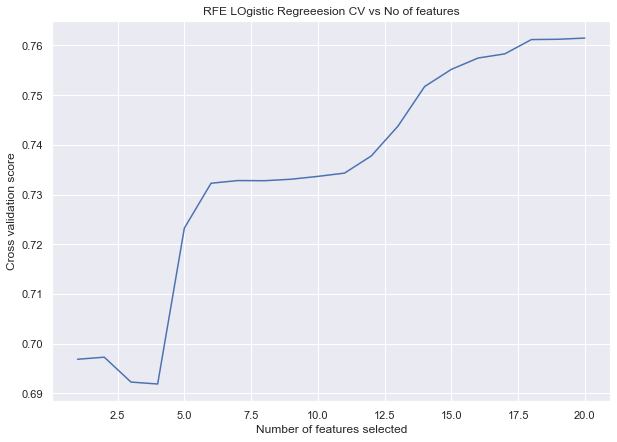

In [121]:
plt.figure(figsize=(10,7))

plt.plot(range(1, len(selector.grid_scores_)+1), selector.grid_scores_)
plt.title("RFE LOgistic Regreeesion CV vs No of features")
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.show()

In [123]:
feature_names = sm_data_X.columns
feature_importance = list(zip(feature_names, selector.support_))

print(feature_importance)

[('CreditScore', True), ('Gender', True), ('Age', True), ('Tenure', True), ('Balance', True), ('HasCrCard', True), ('IsActiveMember', True), ('EstimatedSalary', True), ('Geography__France', True), ('Geography__Germany', True), ('Geography__Spain', True), ('NumOfProd__1', True), ('NumOfProd__2', True), ('NumOfProd__3', True), ('NumOfProd__4', True), ('AgevsTenure', True), ('BalancevsAge', True), ('BalancevsCreditSc', True), ('CreditScvsAge', True), ('EstimatedSalvsAge', True)]


In [125]:
# downsampling the dataset and checking the acuracy and other parameters

temp_df = pd.concat([data, y], axis=1)
temp_df.head()

CreditScore  Gender       Age  Tenure   Balance  HasCrCard  IsActiveMember  \
0        0.538       1  0.324324     0.2  0.000000          1               1   
1        0.516       1  0.310811     0.1  0.334031         -1               1   
2        0.304       1  0.324324     0.8  0.636357          1              -1   
3        0.698       1  0.283784     0.1  0.000000         -1              -1   
4        1.000       1  0.337838     0.2  0.500246          1               1   

   EstimatedSalary  Geography__France  Geography__Germany  Geography__Spain  \
0         0.506735                  1                  -1                -1   
1         0.562709                 -1                  -1                 1   
2         0.569654                  1                  -1                -1   
3         0.469120                  1                  -1                -1   
4         0.395400                 -1                  -1                 1   

   NumOfProd__1  NumOfProd__2  NumOfProd__3  NumOfProd__4  AgevsTenure  \
0             1            -1            -1            -1     0.219780   
1             1            -1            -1            -1     0.439560   
2            -1            -1             1            -1     0.046703   
3            -1             1            -1            -1     0.417582   
4             1            -1            -1            -1     0.225275   

   BalancevsAge  BalancevsCreditSc  CreditScvsAge  EstimatedSalvsAge  Exited  
0      0.000000           0.000000       0.235070           0.220105       1  
1      0.200182           0.296558       0.237212           0.250379       0  
2      0.372284           0.684273       0.168689           0.247435       1  
3      0.000000           0.000000       0.310730           0.219443       0  
4      0.285850           0.317685       0.354747           0.167752       0

In [126]:
temp_df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [127]:
from sklearn.utils import resample

df_majority = temp_df[temp_df['Exited']==0]
df_minority = temp_df[temp_df['Exited']==1]

# Downsampling the majority dataset

df_majority_ds = resample(df_majority, replace=False, n_samples = 2037, random_state = 1)

#Combined the results
df_ds = pd.concat([df_majority_ds, df_minority])

df_ds['Exited'].value_counts()

1    2037
0    2037
Name: Exited, dtype: int64

In [128]:
y_df_ds = df_ds['Exited']
df_ds.drop('Exited', axis=1, inplace=True)

In [130]:
x_train, x_test, y_tran, y_tst = train_test_split(df_ds, y_df_ds, test_size = 0.2, random_state=10)

print(x_train.shape, x_test.shape, y_tran.shape, y_tst.shape)

(3259, 20) (815, 20) (3259,) (815,)


In [133]:
log_reg_ds = LogisticRegression(solver='liblinear', random_state=0).fit(x_train, y_tran)

log_reg_ds_pred = log_reg_ds.predict(x_test)

print("Accuracy: ", accuracy_score(y_tst, log_reg_ds_pred))

Accuracy:  0.7460122699386503


In [134]:
print(classification_report(y_tst, log_reg_ds_pred))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       406
           1       0.75      0.73      0.74       409

    accuracy                           0.75       815
   macro avg       0.75      0.75      0.75       815
weighted avg       0.75      0.75      0.75       815



In [135]:
print(confusion_matrix(y_tst, log_reg_ds_pred))

[[308  98]
 [109 300]]
